In [59]:
import pandas as pd
import numpy as np
import requests
import re
import bs4
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
hotel_name = []
hotel_price = []
hotel_rating = []
hotel_facilities = []
hotel_location = []
hotel_stay_time = []
page_num = []
cities = ['hyderabad','delhi','chennai','bangalore','mumbai','kolkata','pune','noida','gurgaon','goa']
for city in cities:
    for i in range(1,11):

        start_time = time.time()

        url = 'https://www.oyorooms.com/hotels-in-' + city + '/?page={}'.format(i)
        page = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
        pagecontent = page.text
        soup = BeautifulSoup(pagecontent)

        for x in soup.find_all('div',attrs = {'class':'oyo-cell--12-col oyo-cell--8-col-tablet oyo-cell--4-col-phone'}):
            


            hname = x.find('h3',attrs = {'class':"listingHotelDescription__hotelName d-textEllipsis"})
            hfacilities =x.find('div',attrs = {'class' : 'amenityWrapper'})
            hlocation = x.find('div',attrs = {'class':'d-body-lg listingHotelDescription__hotelAddress'})
            hrating = x.find('div',attrs = {'class':'hotelRating__wrapper'})
            hprice = x.find('span',attrs = {'class':'listingPrice__finalPrice'})
            hstay = x.find('div',attrs = {'class':'listingPrice__perRoomNight'})
                           
                           

            if hname is None:
                hotel_name.append(np.NaN)
            else:
                hotel_name.append(hname.text)

            if hfacilities is None:
                hotel_facilities.append(np.NaN)
            else:
                hotel_facilities.append(hfacilities.text)

            if hlocation is None:
                hotel_location.append(np.NaN)
            else:
                hotel_location.append(hlocation.text)

            if hrating is None:
                hotel_rating.append(np.NaN)
            else:
                hotel_rating.append(hrating.text)

            if hprice is None:
                hotel_price.append(np.NaN)
            else:
                hotel_price.append(hprice.text)
                           
            if hstay is None:
                hotel_stay_time.append(np.NaN)
            else:
                hotel_stay_time.append(hstay.text)
            page_num.append(i)

        print('page {} and time {} sec'.format(i,time.time()-start_time))
    
    


page 1 and time 5.8858323097229 sec
page 2 and time 2.6463537216186523 sec
page 3 and time 4.134277582168579 sec
page 4 and time 3.1129064559936523 sec
page 5 and time 3.0343408584594727 sec
page 6 and time 2.7838268280029297 sec
page 7 and time 3.5571556091308594 sec
page 8 and time 3.4233994483947754 sec
page 9 and time 3.403597831726074 sec
page 10 and time 2.515590190887451 sec
page 1 and time 4.13779354095459 sec
page 2 and time 3.891677141189575 sec
page 3 and time 4.093466520309448 sec
page 4 and time 4.644743919372559 sec
page 5 and time 3.8535208702087402 sec
page 6 and time 3.4548680782318115 sec
page 7 and time 4.206858158111572 sec
page 8 and time 4.10485577583313 sec
page 9 and time 3.985867977142334 sec
page 10 and time 3.9462242126464844 sec
page 1 and time 3.1850407123565674 sec
page 2 and time 3.625600814819336 sec
page 3 and time 2.6254618167877197 sec
page 4 and time 2.830573081970215 sec
page 5 and time 3.319183826446533 sec
page 6 and time 2.7976133823394775 sec
pa

In [8]:
hotel_data = pd.DataFrame({'hotel_name':hotel_name,'hotel_location':hotel_location,'hotel_facilities':hotel_facilities,"hotel_rating":hotel_rating,'hotel_price':hotel_price,'page_num':page_num,'hotel_stay_time':hotel_stay_time})

In [9]:
hotel_data.shape

(1701, 7)

In [10]:
hotel_data.head()

hotel_name  \
0                OYO 30665  Sruan Inn   
1  SPOT ON 48349 Sri Sai Lohith Lodge   
2       OYO Townhouse 77018 Gangothri   
3           OYO 37906 New Asian Lodge   
4    OYO 1421 Hotel Nirmal Excellency   

                                      hotel_location  \
0  Near Vishnu Theatre, Abhyudaya Nagar, Hyderaba...   
1  Near Regional Passport Office, Shivaji Nagar, ...   
2         Near RP Road BUS STOP·\n\n\n\n\n\n\n5.7 km   
3  Near Nampally Metro Station, Nampally, Hyderab...   
4  Near Osmania Medical College Gate, Koti, Hyder...   

                                    hotel_facilities  \
0   Parking Facility  Reception  Free Wifi  + 14 ...   
1    Reception  Geyser  Daily Housekeeping  + 6 more   
2   Private Entrance  Parking Facility  Reception...   
3      Reception  Free Wifi  Power backup  + 12 more   
4      Parking Facility  Free Wifi  Geyser  + 9 more   

                   hotel_rating hotel_price  page_num     hotel_stay_time  
0   4.2 (675 Ratings)·Very Good       ₹1014         1  per room per night  
1   4.1 (904 Ratings)·Very Good        ₹461         1  per room per night  
2  4.4 (1465 Ratings)·Very Good       ₹1256         1  per room per night  
3                           NaN       ₹1598         1  per room per night  
4   4.3 (105 Ratings)·Very Good        ₹889         1  per room per night

In [11]:
hotel_data.to_csv(r'C:\\Users\\pattn\\Videos\\python\\DATA SCREAPING\\OYO_Hotel_Data.csv')

# Data Load: Load OYO prices into a dataframe

In [60]:
data = pd.read_csv('C:\\Users\\pattn\\Videos\\python\\DATA SCREAPING\\OYO_Hotel_Data.csv')

In [61]:
data.head()

Unnamed: 0                          hotel_name  \
0           0                OYO 30665  Sruan Inn   
1           1  SPOT ON 48349 Sri Sai Lohith Lodge   
2           2       OYO Townhouse 77018 Gangothri   
3           3           OYO 37906 New Asian Lodge   
4           4    OYO 1421 Hotel Nirmal Excellency   

                                      hotel_location  \
0  Near Vishnu Theatre, Abhyudaya Nagar, Hyderaba...   
1  Near Regional Passport Office, Shivaji Nagar, ...   
2         Near RP Road BUS STOP·\n\n\n\n\n\n\n5.7 km   
3  Near Nampally Metro Station, Nampally, Hyderab...   
4  Near Osmania Medical College Gate, Koti, Hyder...   

                                    hotel_facilities  \
0   Parking Facility  Reception  Free Wifi  + 14 ...   
1    Reception  Geyser  Daily Housekeeping  + 6 more   
2   Private Entrance  Parking Facility  Reception...   
3      Reception  Free Wifi  Power backup  + 12 more   
4      Parking Facility  Free Wifi  Geyser  + 9 more   

                   hotel_rating hotel_price  page_num     hotel_stay_time  
0   4.2 (675 Ratings)·Very Good       ₹1014         1  per room per night  
1   4.1 (904 Ratings)·Very Good        ₹461         1  per room per night  
2  4.4 (1465 Ratings)·Very Good       ₹1256         1  per room per night  
3                           NaN       ₹1598         1  per room per night  
4   4.3 (105 Ratings)·Very Good        ₹889         1  per room per night

# Separating Data

In [62]:
#regex = '\w[a-zA-Z]+'
#data['hotel_name'] = data['hotel_name'].apply(lambda x: re.compile(regex).findall(x))
#data['hotel_name'] = data['hotel_name'].apply(lambda x: str(x).join(x))
#data.head(3)

In [63]:
#data['hotel_name'] = data['hotel_name'].apply(lambda x:str(x).split('[')[1])
#data['hotel_name'] = data['hotel_name'].apply(lambda x:str(x).split(']')[-2])
#data['hotel_name'].value_counts()

In [64]:
#data['hotel_name'] = data['hotel_name'].apply(lambda x:str(x).replace(']',' ').replace(',',' ').replace("'",""))

In [65]:
data.hotel_name[2]

'OYO Townhouse 77018 Gangothri'

In [66]:
regex = r'\d[.]\d'
data['rating'] = data['hotel_rating'].apply(lambda x: re.compile(regex).findall(str(x)))
data['rating'] = data['rating'].apply(lambda x: str(x).join(x))
data.head(3)

Unnamed: 0                          hotel_name  \
0           0                OYO 30665  Sruan Inn   
1           1  SPOT ON 48349 Sri Sai Lohith Lodge   
2           2       OYO Townhouse 77018 Gangothri   

                                      hotel_location  \
0  Near Vishnu Theatre, Abhyudaya Nagar, Hyderaba...   
1  Near Regional Passport Office, Shivaji Nagar, ...   
2         Near RP Road BUS STOP·\n\n\n\n\n\n\n5.7 km   

                                    hotel_facilities  \
0   Parking Facility  Reception  Free Wifi  + 14 ...   
1    Reception  Geyser  Daily Housekeeping  + 6 more   
2   Private Entrance  Parking Facility  Reception...   

                   hotel_rating hotel_price  page_num     hotel_stay_time  \
0   4.2 (675 Ratings)·Very Good       ₹1014         1  per room per night   
1   4.1 (904 Ratings)·Very Good        ₹461         1  per room per night   
2  4.4 (1465 Ratings)·Very Good       ₹1256         1  per room per night   

  rating  
0    4.2  
1    4.1  
2    4.4

In [67]:
regex = r'[0-9][\sa-zA-Z0-9]+Ratings'
data['no_of_ratings'] = data['hotel_rating'].apply(lambda x: re.compile(regex).findall(str(x)))
data['no_of_ratings'] = data['no_of_ratings'].apply(lambda x : str(x).join(x))
data.head(5)

Unnamed: 0                          hotel_name  \
0           0                OYO 30665  Sruan Inn   
1           1  SPOT ON 48349 Sri Sai Lohith Lodge   
2           2       OYO Townhouse 77018 Gangothri   
3           3           OYO 37906 New Asian Lodge   
4           4    OYO 1421 Hotel Nirmal Excellency   

                                      hotel_location  \
0  Near Vishnu Theatre, Abhyudaya Nagar, Hyderaba...   
1  Near Regional Passport Office, Shivaji Nagar, ...   
2         Near RP Road BUS STOP·\n\n\n\n\n\n\n5.7 km   
3  Near Nampally Metro Station, Nampally, Hyderab...   
4  Near Osmania Medical College Gate, Koti, Hyder...   

                                    hotel_facilities  \
0   Parking Facility  Reception  Free Wifi  + 14 ...   
1    Reception  Geyser  Daily Housekeeping  + 6 more   
2   Private Entrance  Parking Facility  Reception...   
3      Reception  Free Wifi  Power backup  + 12 more   
4      Parking Facility  Free Wifi  Geyser  + 9 more   

                   hotel_rating hotel_price  page_num     hotel_stay_time  \
0   4.2 (675 Ratings)·Very Good       ₹1014         1  per room per night   
1   4.1 (904 Ratings)·Very Good        ₹461         1  per room per night   
2  4.4 (1465 Ratings)·Very Good       ₹1256         1  per room per night   
3                           NaN       ₹1598         1  per room per night   
4   4.3 (105 Ratings)·Very Good        ₹889         1  per room per night   

  rating no_of_ratings  
0    4.2   675 Ratings  
1    4.1   904 Ratings  
2    4.4  1465 Ratings  
3                       
4    4.3   105 Ratings

In [68]:
regex = r'\[?Good|Excellent|NaN|]$'
data['rating_performance'] = data['hotel_rating'].apply(lambda x: re.compile(regex).findall(str(x)))
data["rating_performance"] = data["rating_performance"].apply(lambda x:str(x).join(x))
data.head(3)

Unnamed: 0                          hotel_name  \
0           0                OYO 30665  Sruan Inn   
1           1  SPOT ON 48349 Sri Sai Lohith Lodge   
2           2       OYO Townhouse 77018 Gangothri   

                                      hotel_location  \
0  Near Vishnu Theatre, Abhyudaya Nagar, Hyderaba...   
1  Near Regional Passport Office, Shivaji Nagar, ...   
2         Near RP Road BUS STOP·\n\n\n\n\n\n\n5.7 km   

                                    hotel_facilities  \
0   Parking Facility  Reception  Free Wifi  + 14 ...   
1    Reception  Geyser  Daily Housekeeping  + 6 more   
2   Private Entrance  Parking Facility  Reception...   

                   hotel_rating hotel_price  page_num     hotel_stay_time  \
0   4.2 (675 Ratings)·Very Good       ₹1014         1  per room per night   
1   4.1 (904 Ratings)·Very Good        ₹461         1  per room per night   
2  4.4 (1465 Ratings)·Very Good       ₹1256         1  per room per night   

  rating no_of_ratings rating_performance  
0    4.2   675 Ratings               Good  
1    4.1   904 Ratings               Good  
2    4.4  1465 Ratings               Good

In [69]:
regex = r'\ Hyderabad|Delhi|Chennai|Bangalore|Mumbai|Kolkata|Pune|Noida|Gurgaon|Goa'
data['state'] = data['hotel_location'].apply(lambda x: re.compile(regex).findall(x))
data['state'] = data['state'].apply(lambda x: str(x).join(x))
data

Unnamed: 0                             hotel_name  \
0              0                   OYO 30665  Sruan Inn   
1              1     SPOT ON 48349 Sri Sai Lohith Lodge   
2              2          OYO Townhouse 77018 Gangothri   
3              3              OYO 37906 New Asian Lodge   
4              4       OYO 1421 Hotel Nirmal Excellency   
...          ...                                    ...   
1696        1696                         OYO 60494 Dewa   
1697        1697  OYO Home 45724 Peaceful 1bhk Candolim   
1698        1698       OYO Home 23256 Decent 1 BHK Baga   
1699        1699        OYO Home 23260 Decent 1 Bh Baga   
1700        1700      OYO Home 78877 Luxury 2bhk Anjuna   

                                         hotel_location  \
0     Near Vishnu Theatre, Abhyudaya Nagar, Hyderaba...   
1     Near Regional Passport Office, Shivaji Nagar, ...   
2            Near RP Road BUS STOP·\n\n\n\n\n\n\n5.7 km   
3     Near Nampally Metro Station, Nampally, Hyderab...   
4     Near Osmania Medical College Gate, Koti, Hyder...   
...                                                 ...   
1696   Near Airport, Dabolim, Goa·\n\n\n\n\n\n\n14.3 km   
1697  Near Lawande Supermarket, Gauravaddo, Goa·\n\n...   
1698  Near Calangute Beach, Arpora, Goa·\n\n\n\n\n\n...   
1699  Near Our Lady Of Piety Church, Calangute, Goa·...   
1700                  Anjuna, Goa·\n\n\n\n\n\n\n18.8 km   

                                       hotel_facilities  \
0      Parking Facility  Reception  Free Wifi  + 14 ...   
1       Reception  Geyser  Daily Housekeeping  + 6 more   
2      Private Entrance  Parking Facility  Reception...   
3         Reception  Free Wifi  Power backup  + 12 more   
4         Parking Facility  Free Wifi  Geyser  + 9 more   
...                                                 ...   
1696   Free Wifi  Power backup  24/7 Checkin  + 17 more   
1697   Parking Facility  Free Wifi  Refrigerator  + ...   
1698   Private Entrance  Balcony  Power backup  + 16...   
1699      Private Entrance  Refrigerator  TV  + 13 more   
1700   Private Entrance  Free Wifi  CCTV Cameras  + ...   

                      hotel_rating hotel_price  page_num     hotel_stay_time  \
0      4.2 (675 Ratings)·Very Good       ₹1014         1  per room per night   
1      4.1 (904 Ratings)·Very Good        ₹461         1  per room per night   
2     4.4 (1465 Ratings)·Very Good       ₹1256         1  per room per night   
3                              NaN       ₹1598         1  per room per night   
4      4.3 (105 Ratings)·Very Good        ₹889         1  per room per night   
...                            ...         ...       ...                 ...   
1696                           NaN         NaN         5                 NaN   
1697   4.3 (178 Ratings)·Very Good         NaN         5                 NaN   
1698    4.2 (66 Ratings)·Very Good         NaN         5                 NaN   
1699    4.1 (24 Ratings)·Very Good         NaN         5                 NaN   
1700                           NaN         NaN         5                 NaN   

     rating no_of_ratings rating_performance       state  
0       4.2   675 Ratings               Good   Hyderabad  
1       4.1   904 Ratings               Good   Hyderabad  
2       4.4  1465 Ratings               Good              
3                                              Hyderabad  
4       4.3   105 Ratings               Good              
...     ...           ...                ...         ...  
1696                                                 Goa  
1697    4.3   178 Ratings               Good         Goa  
1698    4.2    66 Ratings               Good         Goa  
1699    4.1    24 Ratings               Good         Goa  
1700                                                 Goa  

[1701 rows x 12 columns]

In [70]:
data['state'] = data['state'].apply(lambda x:str(x).split('[')[0])
data['state'].value_counts()

Kolkata       193
Gurgaon       193
Bangalore     191
Delhi         191
Noida         188
 Hyderabad    182
Mumbai        172
Chennai       122
Pune          114
Goa            89
               66
Name: state, dtype: int64

In [71]:
regex = r'(.*)[Hyderabad+Delhi]+[chennai+bangalore+mumbai+kolkata+pune+noida+gurgaon+goa]'
data['hotel_address'] = data['hotel_location'].apply(lambda x: re.compile(regex).findall(x))
data['hotel_address'] = data['hotel_address'].apply(lambda x: str(x).join(x))
data.head(3)

Unnamed: 0                          hotel_name  \
0           0                OYO 30665  Sruan Inn   
1           1  SPOT ON 48349 Sri Sai Lohith Lodge   
2           2       OYO Townhouse 77018 Gangothri   

                                      hotel_location  \
0  Near Vishnu Theatre, Abhyudaya Nagar, Hyderaba...   
1  Near Regional Passport Office, Shivaji Nagar, ...   
2         Near RP Road BUS STOP·\n\n\n\n\n\n\n5.7 km   

                                    hotel_facilities  \
0   Parking Facility  Reception  Free Wifi  + 14 ...   
1    Reception  Geyser  Daily Housekeeping  + 6 more   
2   Private Entrance  Parking Facility  Reception...   

                   hotel_rating hotel_price  page_num     hotel_stay_time  \
0   4.2 (675 Ratings)·Very Good       ₹1014         1  per room per night   
1   4.1 (904 Ratings)·Very Good        ₹461         1  per room per night   
2  4.4 (1465 Ratings)·Very Good       ₹1256         1  per room per night   

  rating no_of_ratings rating_performance       state  \
0    4.2   675 Ratings               Good   Hyderabad   
1    4.1   904 Ratings               Good   Hyderabad   
2    4.4  1465 Ratings               Good               

                                       hotel_address  
0      Near Vishnu Theatre, Abhyudaya Nagar, Hyderab  
1  Near Regional Passport Office, Shivaji Nagar, ...  
2                                         Near RP Ro

# Droping data

In [72]:
data.columns

Index(['Unnamed: 0', 'hotel_name', 'hotel_location', 'hotel_facilities',
       'hotel_rating', 'hotel_price', 'page_num', 'hotel_stay_time', 'rating',
       'no_of_ratings', 'rating_performance', 'state', 'hotel_address'],
      dtype='object')

In [73]:
data1 = data.drop(['hotel_rating','hotel_location','Unnamed: 0'],axis=1)
data1.head(3)

hotel_name  \
0                OYO 30665  Sruan Inn   
1  SPOT ON 48349 Sri Sai Lohith Lodge   
2       OYO Townhouse 77018 Gangothri   

                                    hotel_facilities hotel_price  page_num  \
0   Parking Facility  Reception  Free Wifi  + 14 ...       ₹1014         1   
1    Reception  Geyser  Daily Housekeeping  + 6 more        ₹461         1   
2   Private Entrance  Parking Facility  Reception...       ₹1256         1   

      hotel_stay_time rating no_of_ratings rating_performance       state  \
0  per room per night    4.2   675 Ratings               Good   Hyderabad   
1  per room per night    4.1   904 Ratings               Good   Hyderabad   
2  per room per night    4.4  1465 Ratings               Good               

                                       hotel_address  
0      Near Vishnu Theatre, Abhyudaya Nagar, Hyderab  
1  Near Regional Passport Office, Shivaji Nagar, ...  
2                                         Near RP Ro

# Resizing data

In [74]:
data2 = data1[['hotel_name','hotel_facilities','state','hotel_address','rating','no_of_ratings','rating_performance','hotel_price']]
data2

hotel_name  \
0                      OYO 30665  Sruan Inn   
1        SPOT ON 48349 Sri Sai Lohith Lodge   
2             OYO Townhouse 77018 Gangothri   
3                 OYO 37906 New Asian Lodge   
4          OYO 1421 Hotel Nirmal Excellency   
...                                     ...   
1696                         OYO 60494 Dewa   
1697  OYO Home 45724 Peaceful 1bhk Candolim   
1698       OYO Home 23256 Decent 1 BHK Baga   
1699        OYO Home 23260 Decent 1 Bh Baga   
1700      OYO Home 78877 Luxury 2bhk Anjuna   

                                       hotel_facilities       state  \
0      Parking Facility  Reception  Free Wifi  + 14 ...   Hyderabad   
1       Reception  Geyser  Daily Housekeeping  + 6 more   Hyderabad   
2      Private Entrance  Parking Facility  Reception...               
3         Reception  Free Wifi  Power backup  + 12 more   Hyderabad   
4         Parking Facility  Free Wifi  Geyser  + 9 more               
...                                                 ...         ...   
1696   Free Wifi  Power backup  24/7 Checkin  + 17 more         Goa   
1697   Parking Facility  Free Wifi  Refrigerator  + ...         Goa   
1698   Private Entrance  Balcony  Power backup  + 16...         Goa   
1699      Private Entrance  Refrigerator  TV  + 13 more         Goa   
1700   Private Entrance  Free Wifi  CCTV Cameras  + ...         Goa   

                                          hotel_address rating no_of_ratings  \
0         Near Vishnu Theatre, Abhyudaya Nagar, Hyderab    4.2   675 Ratings   
1     Near Regional Passport Office, Shivaji Nagar, ...    4.1   904 Ratings   
2                                            Near RP Ro    4.4  1465 Ratings   
3        Near Nampally Metro Station, Nampally, Hyderab                        
4       Near Osmania Medical College Gate, Koti, Hyderb    4.3   105 Ratings   
...                                                 ...    ...           ...   
1696                                Near Airport, Dabol                        
1697                 Near Lawande Supermarket, Gauravad    4.3   178 Ratings   
1698                         Near Calangute Beach, Arpo    4.2    66 Ratings   
1699                 Near Our Lady Of Piety Church, Cal    4.1    24 Ratings   
1700                                                                           

     rating_performance hotel_price  
0                  Good       ₹1014  
1                  Good        ₹461  
2                  Good       ₹1256  
3                             ₹1598  
4                  Good        ₹889  
...                 ...         ...  
1696                            NaN  
1697               Good         NaN  
1698               Good         NaN  
1699               Good         NaN  
1700                            NaN  

[1701 rows x 8 columns]

In [75]:
data2.dtypes

hotel_name            object
hotel_facilities      object
state                 object
hotel_address         object
rating                object
no_of_ratings         object
rating_performance    object
hotel_price           object
dtype: object

# removing the special characters & converting the data types

In [76]:
data2

hotel_name  \
0                      OYO 30665  Sruan Inn   
1        SPOT ON 48349 Sri Sai Lohith Lodge   
2             OYO Townhouse 77018 Gangothri   
3                 OYO 37906 New Asian Lodge   
4          OYO 1421 Hotel Nirmal Excellency   
...                                     ...   
1696                         OYO 60494 Dewa   
1697  OYO Home 45724 Peaceful 1bhk Candolim   
1698       OYO Home 23256 Decent 1 BHK Baga   
1699        OYO Home 23260 Decent 1 Bh Baga   
1700      OYO Home 78877 Luxury 2bhk Anjuna   

                                       hotel_facilities       state  \
0      Parking Facility  Reception  Free Wifi  + 14 ...   Hyderabad   
1       Reception  Geyser  Daily Housekeeping  + 6 more   Hyderabad   
2      Private Entrance  Parking Facility  Reception...               
3         Reception  Free Wifi  Power backup  + 12 more   Hyderabad   
4         Parking Facility  Free Wifi  Geyser  + 9 more               
...                                                 ...         ...   
1696   Free Wifi  Power backup  24/7 Checkin  + 17 more         Goa   
1697   Parking Facility  Free Wifi  Refrigerator  + ...         Goa   
1698   Private Entrance  Balcony  Power backup  + 16...         Goa   
1699      Private Entrance  Refrigerator  TV  + 13 more         Goa   
1700   Private Entrance  Free Wifi  CCTV Cameras  + ...         Goa   

                                          hotel_address rating no_of_ratings  \
0         Near Vishnu Theatre, Abhyudaya Nagar, Hyderab    4.2   675 Ratings   
1     Near Regional Passport Office, Shivaji Nagar, ...    4.1   904 Ratings   
2                                            Near RP Ro    4.4  1465 Ratings   
3        Near Nampally Metro Station, Nampally, Hyderab                        
4       Near Osmania Medical College Gate, Koti, Hyderb    4.3   105 Ratings   
...                                                 ...    ...           ...   
1696                                Near Airport, Dabol                        
1697                 Near Lawande Supermarket, Gauravad    4.3   178 Ratings   
1698                         Near Calangute Beach, Arpo    4.2    66 Ratings   
1699                 Near Our Lady Of Piety Church, Cal    4.1    24 Ratings   
1700                                                                           

     rating_performance hotel_price  
0                  Good       ₹1014  
1                  Good        ₹461  
2                  Good       ₹1256  
3                             ₹1598  
4                  Good        ₹889  
...                 ...         ...  
1696                            NaN  
1697               Good         NaN  
1698               Good         NaN  
1699               Good         NaN  
1700                            NaN  

[1701 rows x 8 columns]

In [77]:
#data1['hotel_price'] = float(data1['hotel_price'][0].replace('₹',''))

In [78]:
# OR
data2['hotel_price'] = data2['hotel_price'].apply(lambda x:str(x).replace('₹','')).astype(float)

<ipython-input-78-75a9a409f0ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['hotel_price'] = data2['hotel_price'].apply(lambda x:str(x).replace('₹','')).astype(float)


In [79]:
data2['rating'] = data2['rating'].replace('','0')

<ipython-input-79-9e32559a975d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['rating'] = data2['rating'].replace('','0')


In [80]:
data2['rating'] = data2['rating'].astype('float')

<ipython-input-80-7818f627355a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['rating'] = data2['rating'].astype('float')


In [81]:
data2.dtypes

hotel_name             object
hotel_facilities       object
state                  object
hotel_address          object
rating                float64
no_of_ratings          object
rating_performance     object
hotel_price           float64
dtype: object

In [82]:
data2.head(1)

hotel_name                                   hotel_facilities  \
0  OYO 30665  Sruan Inn   Parking Facility  Reception  Free Wifi  + 14 ...   

        state                                  hotel_address  rating  \
0   Hyderabad  Near Vishnu Theatre, Abhyudaya Nagar, Hyderab     4.2   

  no_of_ratings rating_performance  hotel_price  
0   675 Ratings               Good       1014.0

# Data Cleaning: Handle NA values

In [83]:
data2[data2.rating<1].count()

hotel_name            357
hotel_facilities      353
state                 357
hotel_address         357
rating                357
no_of_ratings         357
rating_performance    357
hotel_price           353
dtype: int64

In [84]:
data2.shape

(1701, 8)

In [85]:
data2.isnull().sum()

hotel_name             0
hotel_facilities      13
state                  0
hotel_address          0
rating                 0
no_of_ratings          0
rating_performance     0
hotel_price           11
dtype: int64

In [86]:
data3 = data2.dropna()
data3.isnull().sum()

hotel_name            0
hotel_facilities      0
state                 0
hotel_address         0
rating                0
no_of_ratings         0
rating_performance    0
hotel_price           0
dtype: int64

In [87]:
data3.shape

(1677, 8)

In [88]:
data3 = data3[data3.rating>1].dropna()

In [89]:
data3.shape

(1328, 8)

In [90]:
#data2.drop([206,271,347],inplace=True)

In [91]:
#data2[data2.rating>4.7]

# Data Visualization (Uni, Bi and Multi-variate) Plot the every variable

# Plots for Numerical and Categorical variables


# Plots for Numerical to Categorical variable


# Plots for Categorical to Numerical variables [Box-plot, Bar-plot, count plot, Pie chart, Scatter-plot, violin-plot,Distribution-plot, Heat map, Histogram and kde-plot etc., Use all plots for individual variables]

# Data Analysis


# Uni-variate Analysis

### Using Plots In Uni-variate
count plot,
Distribution-plot,
Histogram,

In [92]:
data3.head()

hotel_name  \
0                OYO 30665  Sruan Inn   
1  SPOT ON 48349 Sri Sai Lohith Lodge   
2       OYO Townhouse 77018 Gangothri   
4    OYO 1421 Hotel Nirmal Excellency   
5             OYO 61506 Sai Residency   

                                    hotel_facilities       state  \
0   Parking Facility  Reception  Free Wifi  + 14 ...   Hyderabad   
1    Reception  Geyser  Daily Housekeeping  + 6 more   Hyderabad   
2   Private Entrance  Parking Facility  Reception...               
4      Parking Facility  Free Wifi  Geyser  + 9 more               
5             Reception  Free Wifi  Geyser  + 9 more   Hyderabad   

                                       hotel_address  rating no_of_ratings  \
0      Near Vishnu Theatre, Abhyudaya Nagar, Hyderab     4.2   675 Ratings   
1  Near Regional Passport Office, Shivaji Nagar, ...     4.1   904 Ratings   
2                                         Near RP Ro     4.4  1465 Ratings   
4    Near Osmania Medical College Gate, Koti, Hyderb     4.3   105 Ratings   
5  Near Sr nagar metro station, Jawahar Nagar, Hy...     3.9   556 Ratings   

  rating_performance  hotel_price  
0               Good       1014.0  
1               Good        461.0  
2               Good       1256.0  
4               Good        889.0  
5               Good       1014.0

In [93]:
num1 = list(data2.select_dtypes('number').columns)
num1

['rating', 'hotel_price']

#### Distribution-plot

C:\Users\pattn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hotel_price', ylabel='Density'>

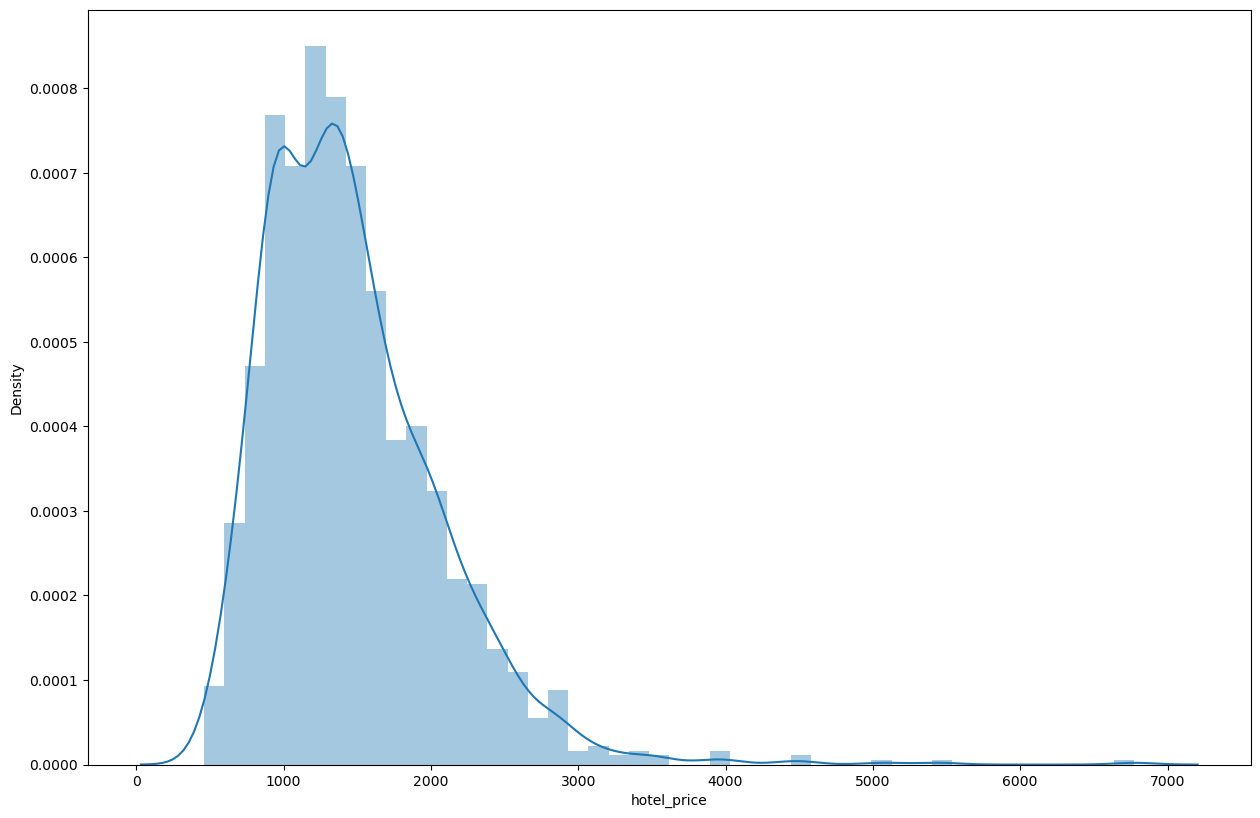

In [94]:
plt.figure(dpi=100,figsize=(15,10))
sns.distplot(data3.hotel_price)

Base on above chart Checking hotel_price and there are some outliers, those outliers are (3000-7000) 
and the most price availeble in this chart are (800-2000)

#### count plot

C:\Users\pattn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

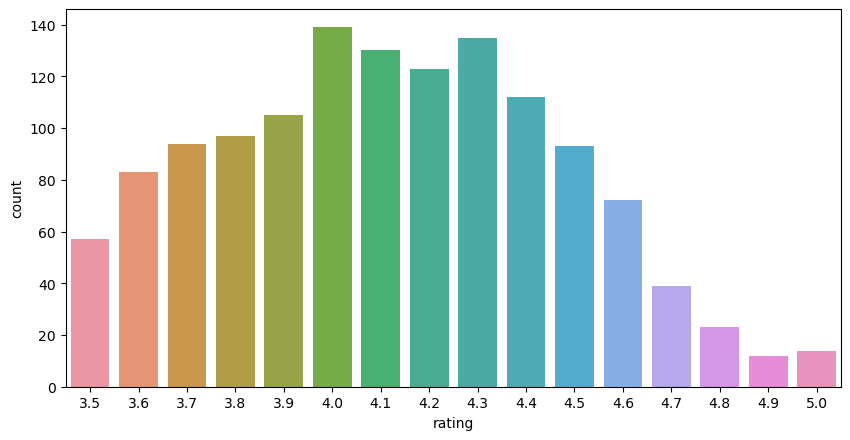

In [95]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(data3.rating)

                                    Base on above chart Checking rating

# Categorical variables Analysis

In [96]:
data3.head(1)

hotel_name                                   hotel_facilities  \
0  OYO 30665  Sruan Inn   Parking Facility  Reception  Free Wifi  + 14 ...   

        state                                  hotel_address  rating  \
0   Hyderabad  Near Vishnu Theatre, Abhyudaya Nagar, Hyderab     4.2   

  no_of_ratings rating_performance  hotel_price  
0   675 Ratings               Good       1014.0

#### Histogram

In [97]:
#plt.rcParams['figure.figsize'] = (10,5)
#data3['hotel_name'].hist()
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

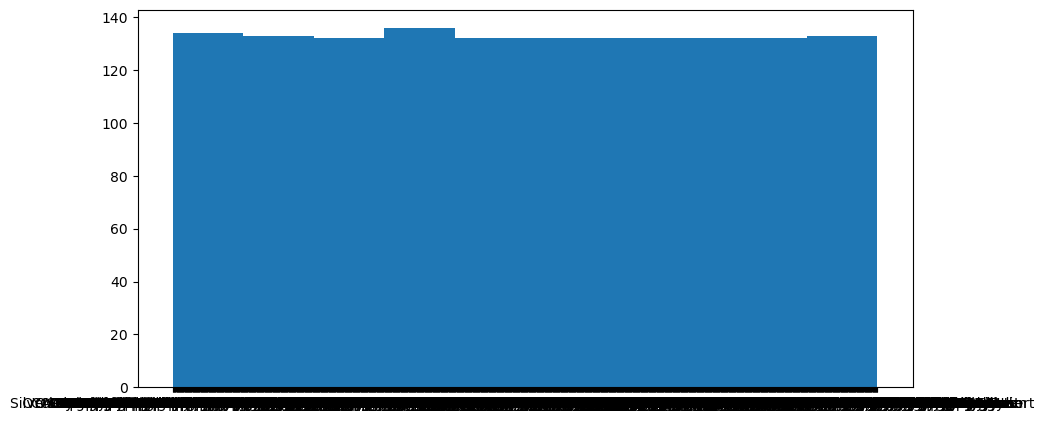

In [98]:
plt.figure(dpi=100,figsize=(10,5))
plt.hist(data3.hotel_name)
plt.show


                                         Base on above chart Checking hotel_name

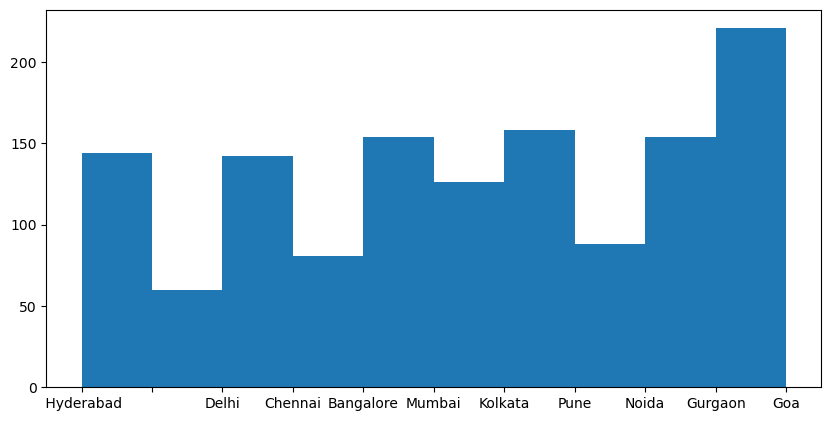

In [99]:
plt.figure(dpi=100,figsize=(10,5))
plt.hist(data3.state)
plt.show()

                                  Base on above chart Checking state

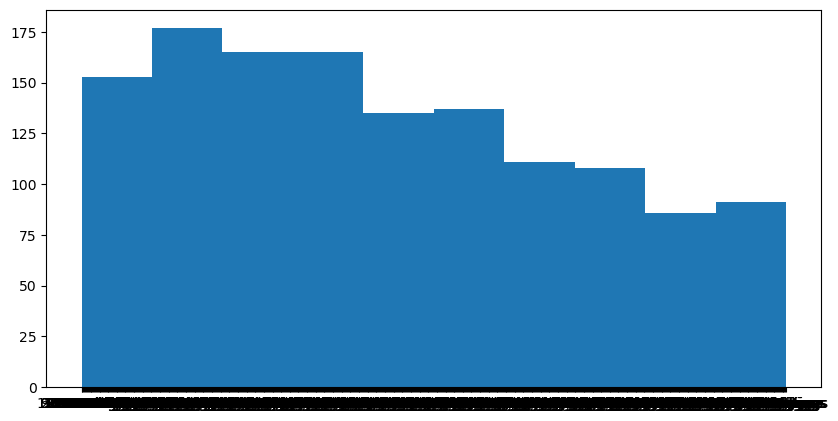

In [100]:
plt.figure(dpi=100,figsize=(10,5))
plt.hist(x= data3.no_of_ratings)
plt.show()

                                    Base on above chart Checking no_of_ratings

C:\Users\pattn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

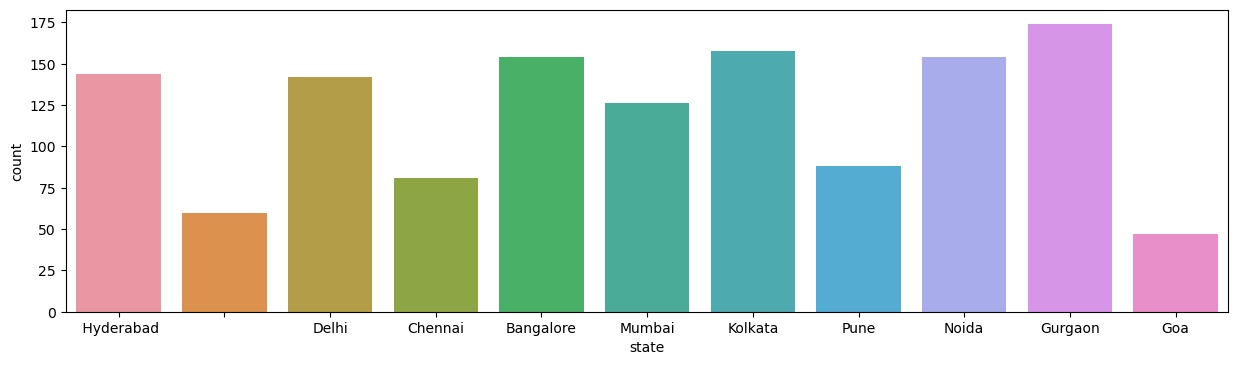

In [101]:
plt.figure(dpi = 100, figsize=(15,4))
sns.countplot(data3.state)

                                           Base on above chart Checking All The state

# Bi-variate Analysis

### Using Plots In Bi-variate

Box-plot, 
Bar-plot,
Pie chart, 
Scatter-plot, 
violin-plot,



#### Box-plot

<AxesSubplot:xlabel='rating', ylabel='hotel_price'>

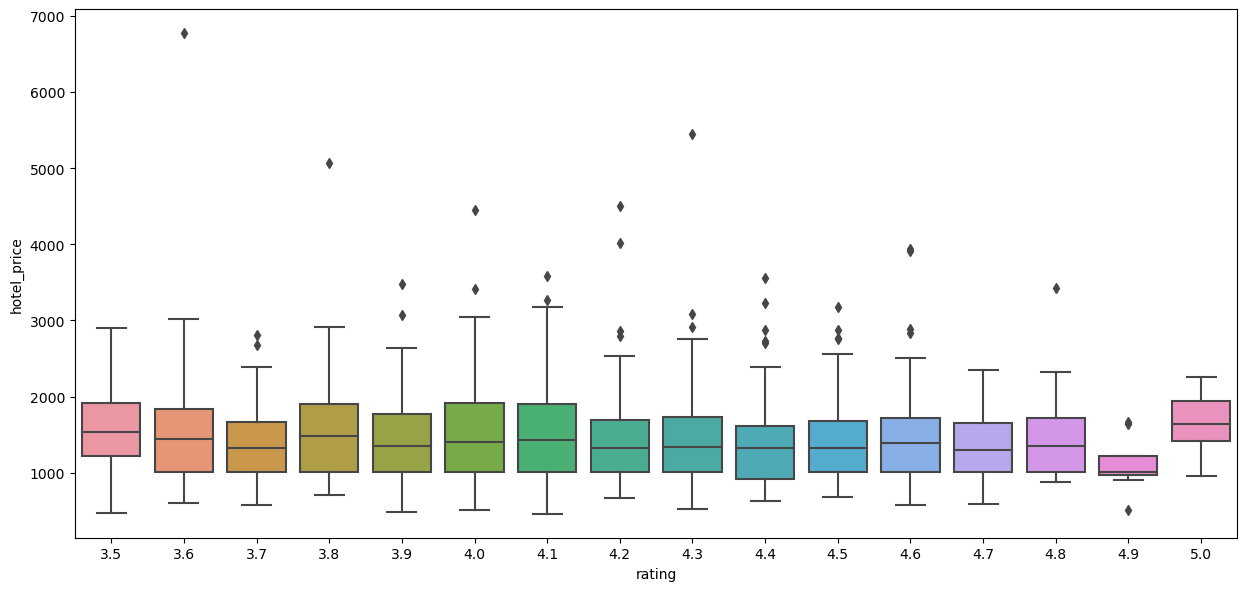

In [102]:
plt.figure(dpi = 100, figsize=(15,7))
sns.boxplot(x = data3.rating, y = data3.hotel_price)

#### Bar-plot

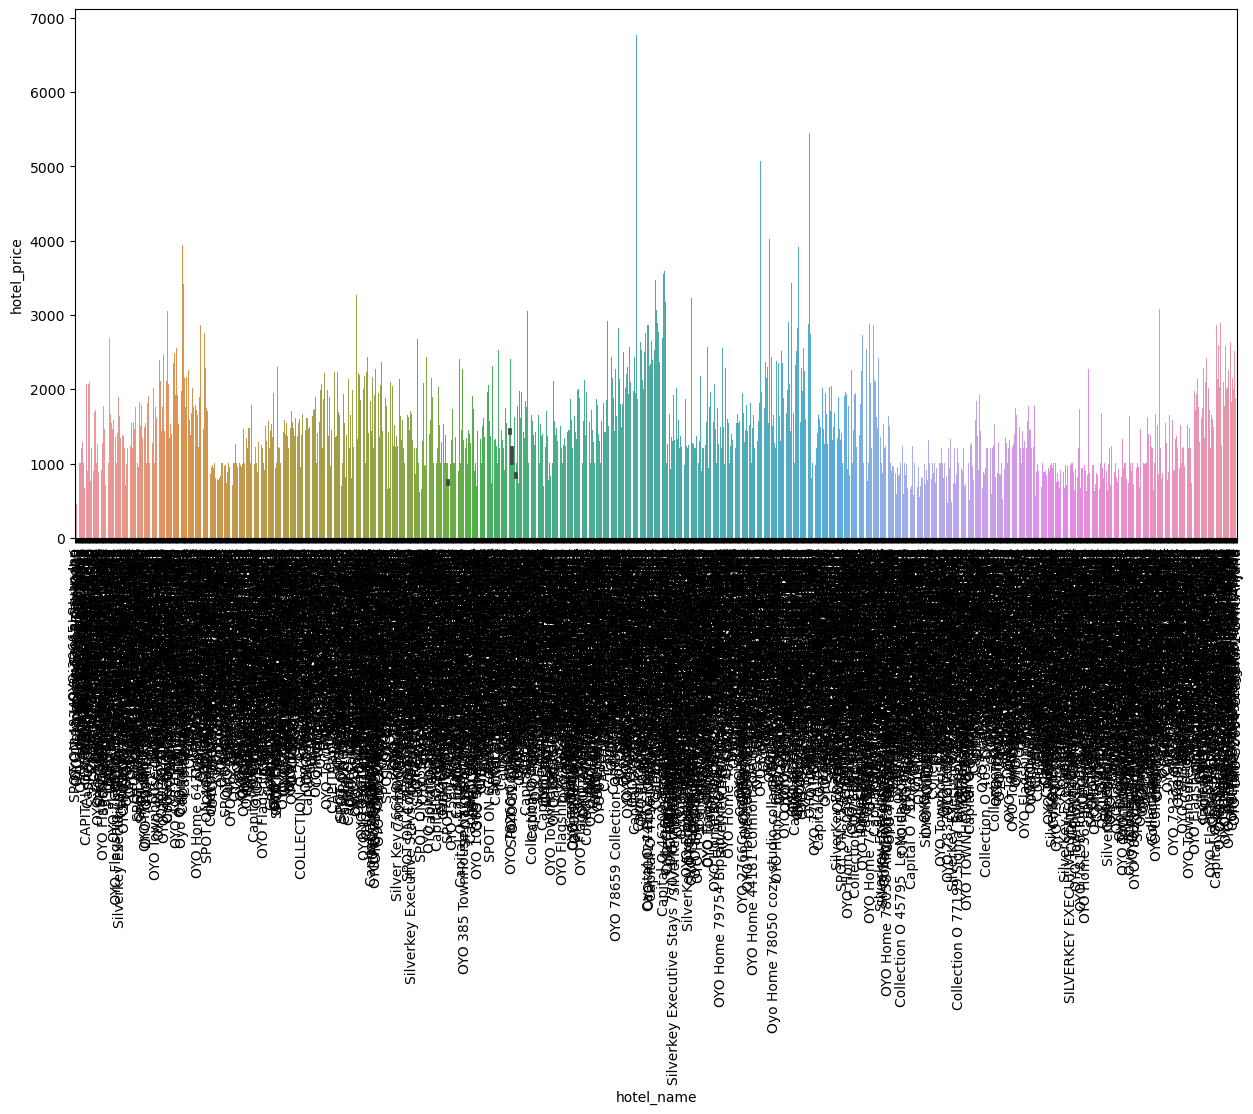

In [103]:
plt.figure(dpi = 100, figsize=(15,7))
sns.barplot(x = data3.hotel_name, y = data3.hotel_price)
plt.xticks(rotation=90)
plt.show()

                           Base on Above Chart its shows Every hotel rooms and its prices

#### Scatter-plot

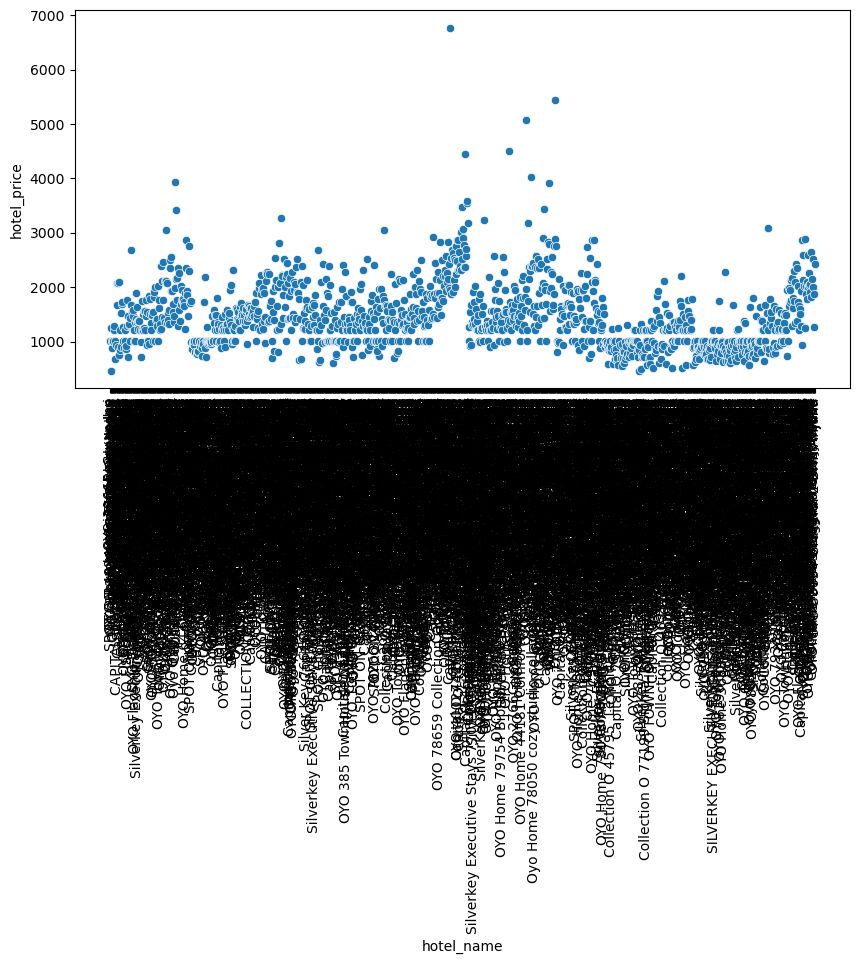

In [104]:
plt.figure(dpi=100,figsize=(10,5))

sns.scatterplot(x=data3['hotel_name'],y=data3['hotel_price'])
plt.xticks(rotation=90)
plt.show()

     On this chart Checking hotel_name and its hotel_price and there are some outliers , those outliers are (3200 - 7000)

#### violin-plot

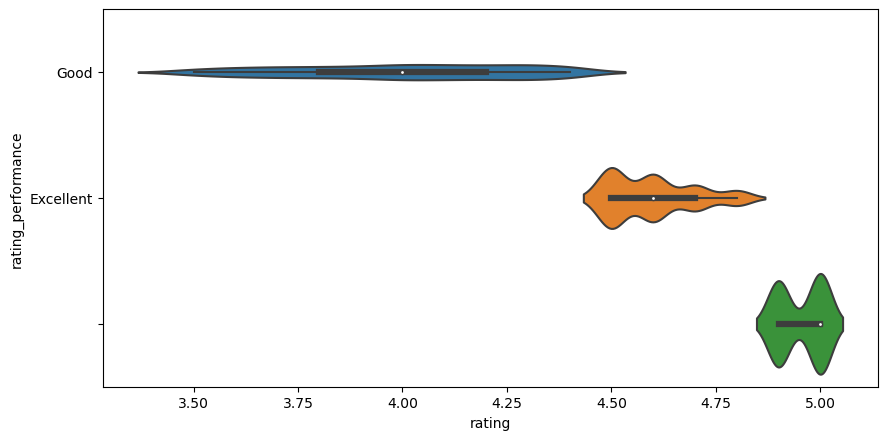

In [105]:
plt.figure(dpi=100,figsize=(10,5))
sns.violinplot(x=data3['rating'],y=data3['rating_performance'])
plt.show()

  On Above Chart Checking rating & rating_performance and (Good) ratings are in range(3.4 - 4.6)  &  (4.4 - 5.00) are Excellent & non Values Are (4.8 - 5.00)

In [106]:
data3.head(1)

hotel_name                                   hotel_facilities  \
0  OYO 30665  Sruan Inn   Parking Facility  Reception  Free Wifi  + 14 ...   

        state                                  hotel_address  rating  \
0   Hyderabad  Near Vishnu Theatre, Abhyudaya Nagar, Hyderab     4.2   

  no_of_ratings rating_performance  hotel_price  
0   675 Ratings               Good       1014.0

# Multi-variate Analysis using Group by concept and describing the statistical analysis


<function matplotlib.pyplot.show(close=None, block=None)>

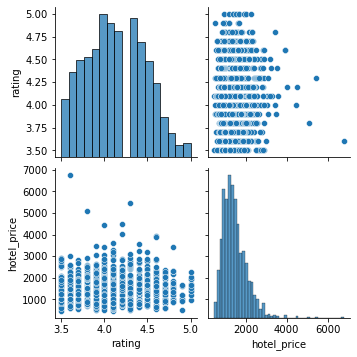

In [107]:
sns.pairplot(data3)
plt.show

              On The Above Chart Checking All the Multi-variate on the Data

#### Get the Minimum maximum and Mean Price of each hotel_name

In [108]:
data3.groupby(['hotel_name'],as_index = False).agg({'hotel_price':['min', 'max', 'mean']})

hotel_name hotel_price          \
                                                                min     max   
0        OYO 2766Guest Accomodation CK Block Guesthouse      1684.0  1684.0   
1        OYO Flagship 76655 Goldhorn Hotels Mehdipatnam      1014.0  1014.0   
2                     Oyo Townhouse 222 Sec 52, Gurgaon      1014.0  1014.0   
3                               CAPITAL O 47966 GolfInn       662.0   662.0   
4                                CAPITAL O11243 Vedanta       889.0   889.0   
...                                                 ...         ...     ...   
1317              SilverKey Executive Stays Royal Homes      1014.0  1014.0   
1318  Silverkey Executive Stays 22453 Himayat Nagar ...      1351.0  1351.0   
1319  Silverkey Executive Stays 39640 Near Arup Hosp...      1003.0  1003.0   
1320  Silverkey Executive Stays 76499 Usha Residency...      1312.0  1312.0   
1321  Silverkey Executive Stays 77071 Giriraj Stayhu...      1314.0  1314.0   

              
        mean  
0     1684.0  
1     1014.0  
2     1014.0  
3      662.0  
4      889.0  
...      ...  
1317  1014.0  
1318  1351.0  
1319  1003.0  
1320  1312.0  
1321  1314.0  

[1322 rows x 4 columns]

### Visualize the Mean Price from Each hotel_name

In [109]:
name_price_mean = data3.groupby('hotel_name')['hotel_price'].mean()
name_price_mean.head(2)

hotel_name
 OYO 2766Guest Accomodation CK Block Guesthouse    1684.0
 OYO Flagship 76655 Goldhorn Hotels Mehdipatnam    1014.0
Name: hotel_price, dtype: float64

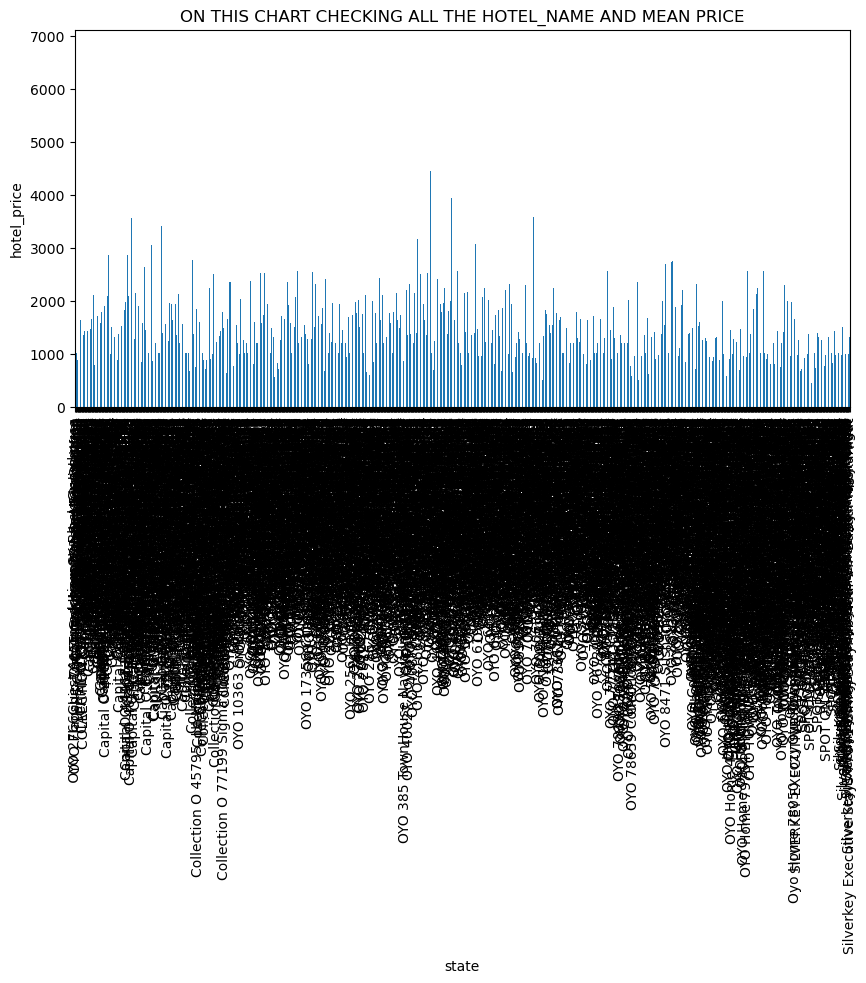

In [110]:
plt.figure(dpi=100, figsize=(10,5))
name_price_mean.plot.bar()
plt.title('ON THIS CHART CHECKING ALL THE HOTEL_NAME AND MEAN PRICE')
plt.xlabel('state')
plt.ylabel('hotel_price')
plt.show()

### Visualize the max Price from Each hotel_name

In [111]:
data3['hotel_price'].max()

6775.0

In [112]:
data3.sort_values(['hotel_price'],ascending=False).head(3)

hotel_name  \
849      OYO 66982 Hotel Skyway Inn   
1090  OYO 76542 Joyguru Guest House   
1017       OYO 70583 Rainbow Palace   

                                       hotel_facilities    state  \
849                  Reception  Free Wifi  AC  + 9 more   Mumbai   
1090   Parking Facility  Private Entrance  Free Wifi...  Kolkata   
1017   Private Entrance  Parking Facility  Reception...  Kolkata   

                                      hotel_address  rating no_of_ratings  \
849      Near Lokmanya Tilak Nagar, Saki Naka, Mumb     3.6  1149 Ratings   
1090                                  Kolkata, Kolk     4.3   218 Ratings   
1017  Near Acropolis Mall, Rajdanga Main Road, Kolk     3.8   720 Ratings   

     rating_performance  hotel_price  
849                Good       6775.0  
1090               Good       5451.0  
1017               Good       5073.0

In [113]:
name_price_max = data3.groupby('hotel_name')['hotel_price'].max()

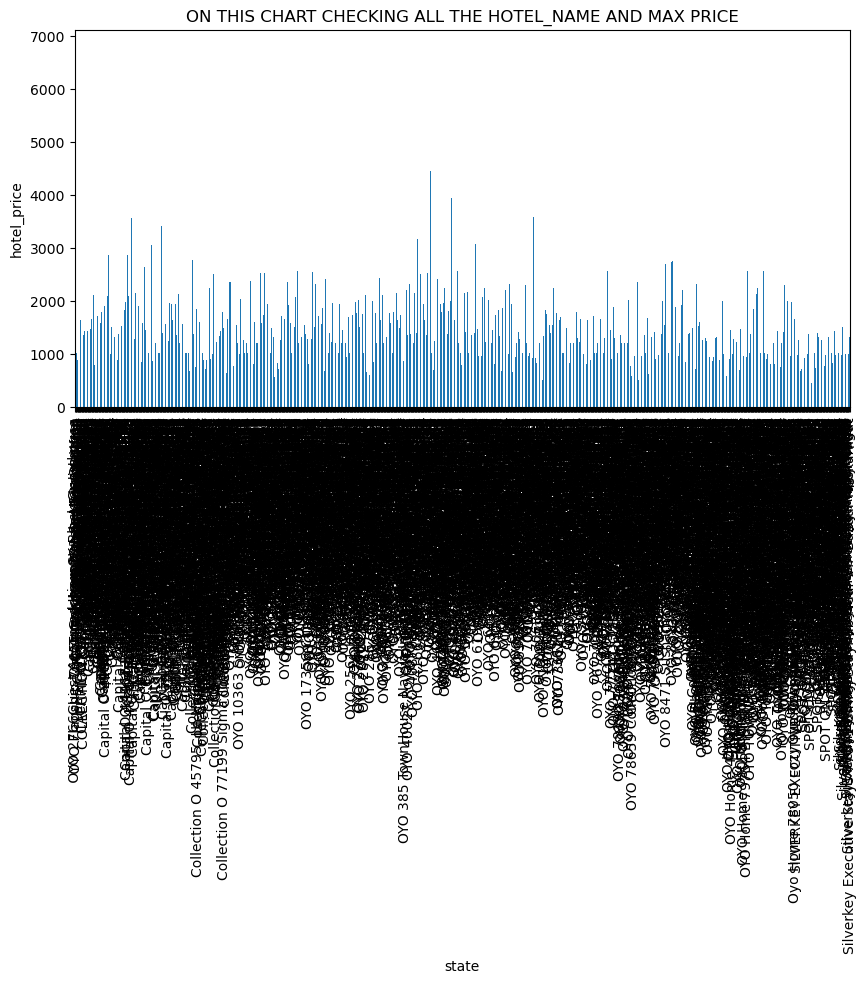

In [114]:
plt.figure(dpi=100, figsize=(10,5))
name_price_max.plot.bar()
plt.title('ON THIS CHART CHECKING ALL THE HOTEL_NAME AND MAX PRICE')
plt.xlabel('state')
plt.ylabel('hotel_price')
plt.show()

### Visualize the min Price from Each hotel_name

In [115]:
data3.groupby(['hotel_price']).min().head(3)

hotel_name  \
hotel_price                                       
461.0        SPOT ON 48349 Sri Sai Lohith Lodge   
466.0             OYO  spot on 9077 Golden Tree   
489.0                 SPOT ON 11050 Golden Nest   

                                             hotel_facilities       state  \
hotel_price                                                                 
461.0         Reception  Geyser  Daily Housekeeping  + 6 more   Hyderabad   
466.0           Parking Facility  Free Wifi  Geyser  + 7 more       Noida   
489.0         Parking Facility  Elevator  Free Wifi  + 6 more       Noida   

                                                 hotel_address  rating  \
hotel_price                                                              
461.0        Near Regional Passport Office, Shivaji Nagar, ...     4.1   
466.0                       Near Shopprix Mall, Sector 61, Noi     3.5   
489.0                  Near Sleepwell Showroom, Sector 66, Noi     3.9   

            no_of_ratings rating_performance  
hotel_price                                   
461.0         904 Ratings               Good  
466.0         828 Ratings               Good  
489.0        2679 Ratings               Good

In [116]:
name_price_min = data3.groupby('hotel_name')['hotel_price'].min()
name_price_min.head(2)

hotel_name
 OYO 2766Guest Accomodation CK Block Guesthouse    1684.0
 OYO Flagship 76655 Goldhorn Hotels Mehdipatnam    1014.0
Name: hotel_price, dtype: float64

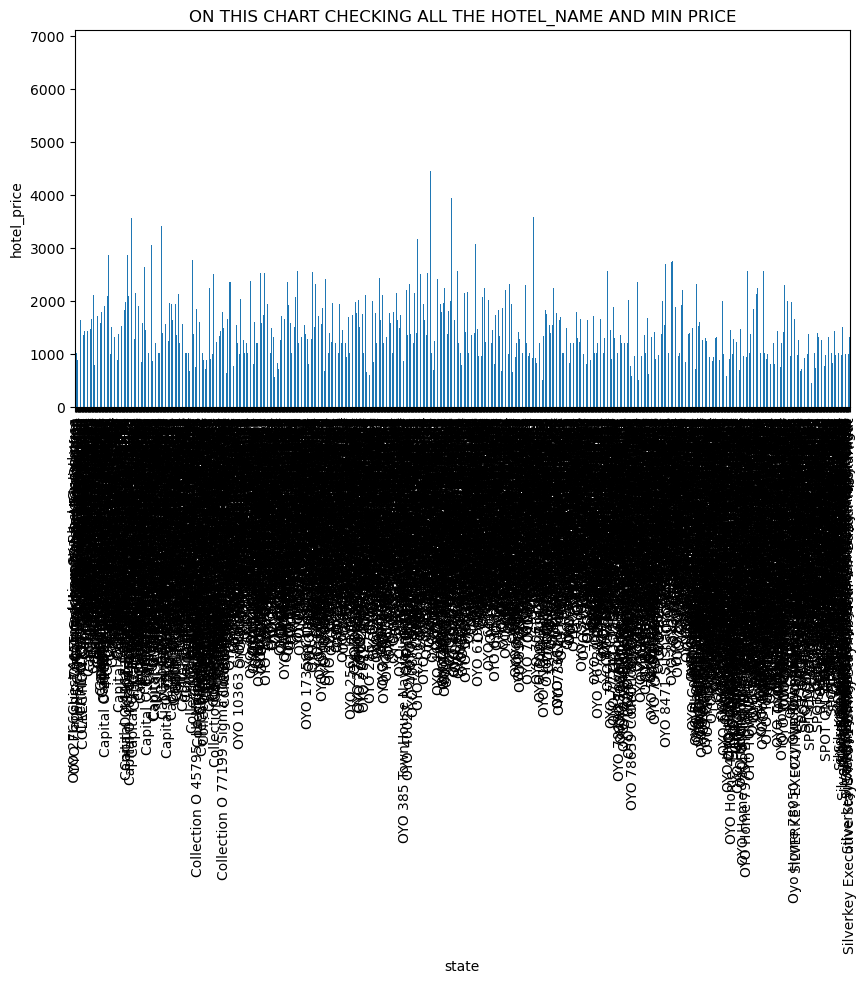

In [117]:
plt.figure(dpi=100, figsize=(10,5))
name_price_min.plot.bar()
plt.title('ON THIS CHART CHECKING ALL THE HOTEL_NAME AND MIN PRICE')
plt.xlabel('state')
plt.ylabel('hotel_price')
plt.show()

# Get the Minimum maximum and Mean Price of each & Every State

In [118]:
data3.groupby(['state'], as_index=False).agg({'hotel_price':['min', 'max', 'mean']})

state hotel_price                     
                       min     max         mean
0                    516.0  2393.0  1365.666667
1    Hyderabad       461.0  3943.0  1567.534722
2    Bangalore       596.0  3051.0  1388.181818
3      Chennai       656.0  3264.0  1655.679012
4        Delhi       712.0  2307.0  1347.605634
5          Goa      1216.0  2888.0  1960.489362
6      Gurgaon       562.0  3080.0  1036.005747
7      Kolkata       901.0  5451.0  1782.139241
8       Mumbai      1014.0  6775.0  2010.555556
9        Noida       466.0  2107.0  1034.188312
10        Pune       702.0  2874.0  1544.113636

#### Visualize the Maximun Price from Each State

In [119]:
data3.groupby('state')['hotel_price'].max()

state
              2393.0
 Hyderabad    3943.0
Bangalore     3051.0
Chennai       3264.0
Delhi         2307.0
Goa           2888.0
Gurgaon       3080.0
Kolkata       5451.0
Mumbai        6775.0
Noida         2107.0
Pune          2874.0
Name: hotel_price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

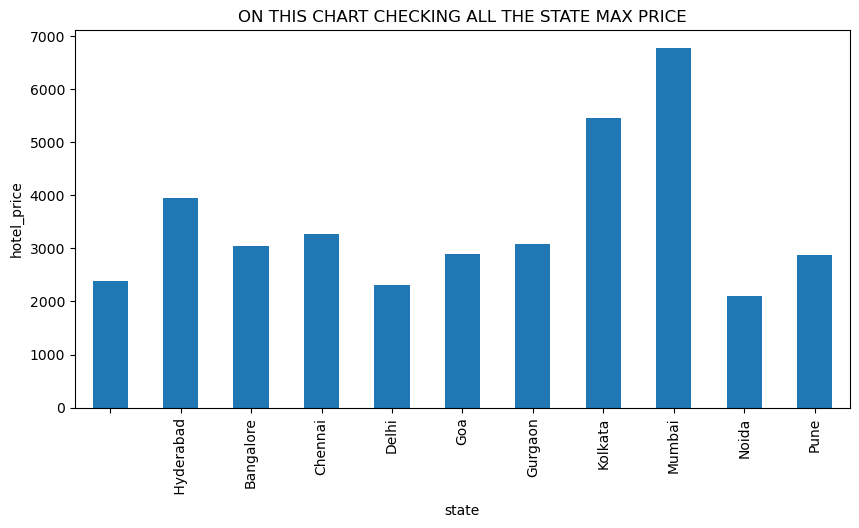

In [120]:
plt.figure(dpi=100, figsize=(10,5))
data3.groupby('state')['hotel_price'].max().plot(kind='bar')
plt.title('ON THIS CHART CHECKING ALL THE STATE MAX PRICE')
plt.xlabel('state')
plt.ylabel('hotel_price')
plt.show

#### Visualize the Minimum Price from each state

In [121]:
data3.groupby('state')['hotel_price'].min()

state
               516.0
 Hyderabad     461.0
Bangalore      596.0
Chennai        656.0
Delhi          712.0
Goa           1216.0
Gurgaon        562.0
Kolkata        901.0
Mumbai        1014.0
Noida          466.0
Pune           702.0
Name: hotel_price, dtype: float64

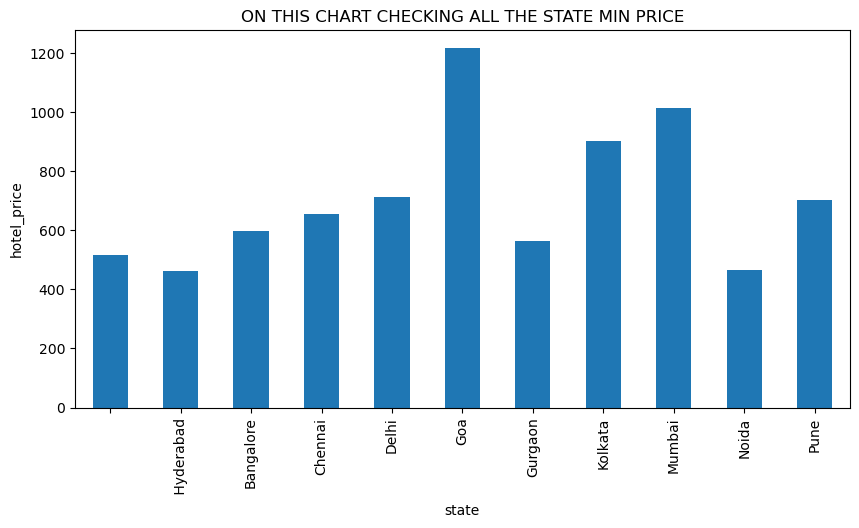

In [122]:
plt.figure(dpi=100,figsize=(10,5))
data3.groupby('state')['hotel_price'].min().plot(kind='bar')
plt.title('ON THIS CHART CHECKING ALL THE STATE MIN PRICE')
plt.xlabel('state')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the Mean Price from each state

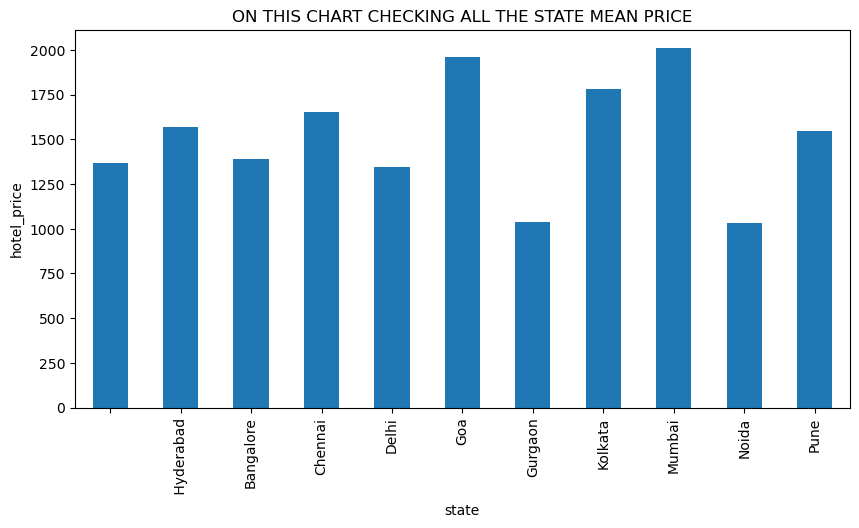

In [123]:
plt.figure(dpi=100,figsize=(10,5))
data3.groupby('state')['hotel_price'].mean().plot(kind='bar')
plt.title('ON THIS CHART CHECKING ALL THE STATE MEAN PRICE')
plt.xlabel('state')
plt.ylabel('hotel_price')
plt.show()

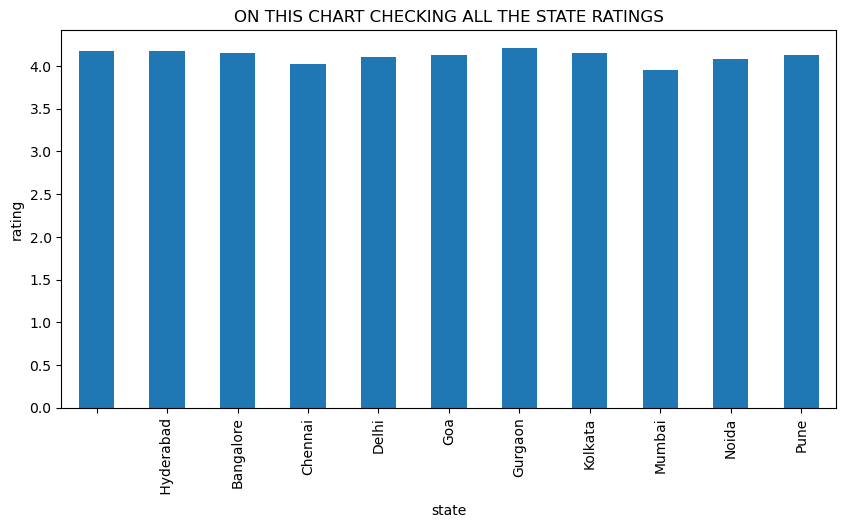

In [124]:
plt.figure(dpi=100,figsize=(10,5))
data3.groupby('state')['rating'].mean().plot(kind='bar')
plt.title('ON THIS CHART CHECKING ALL THE STATE RATINGS')
plt.xlabel('state')
plt.ylabel('rating')
plt.show()

## Get the Minimum maximum and Mean Price of each hotel_name from Every State

In [125]:
data3.state.value_counts()

Gurgaon       174
Kolkata       158
Bangalore     154
Noida         154
 Hyderabad    144
Delhi         142
Mumbai        126
Pune           88
Chennai        81
               60
Goa            47
Name: state, dtype: int64

In [126]:
data_hyd = data3[data3['state'] == ' Hyderabad']

data_gur = data3[data3['state'] == 'Gurgaon']

data_kol = data3[data3['state'] == 'Kolkata']

data_bang = data3[data3['state'] == 'Bangalore']

data_noida = data3[data3['state'] == 'Noida']

data_delhi = data3[data3['state'] == 'Delhi']

data_mumbai = data3[data3['state'] == 'Mumbai']

data_pune = data3[data3['state'] == 'Pune']

data_chennai = data3[data3['state'] == 'Chennai']

data_goa = data3[data3['state'] == 'Goa']

## Get the Minimum maximum and Mean Price of each hotel_name from Hyderabad

In [127]:
data_hyd.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                                           min     max    mean
0   OYO Flagship 76655 Goldhorn Hotels Mehdipatnam      1014.0  1014.0  1014.0
1                CAPITAL O75039 Hotel Quality Inn       2692.0  2692.0  2692.0
2        CAPITAL O75502 Hotel Asian International       2070.0  2070.0  2070.0

#### Visualize the Min Price of Each hotel_name From Hyderabad

In [128]:
data_hyd.groupby(['hotel_price']).min().head(2)

hotel_name  \
hotel_price                                       
461.0        SPOT ON 48349 Sri Sai Lohith Lodge   
675.0               SPOT ON 37214 Classic Lodge   

                                             hotel_facilities       state  \
hotel_price                                                                 
461.0         Reception  Geyser  Daily Housekeeping  + 6 more   Hyderabad   
675.0                AC  Parking Facility  Elevator  + 8 more   Hyderabad   

                                                 hotel_address  rating  \
hotel_price                                                              
461.0        Near Regional Passport Office, Shivaji Nagar, ...     4.1   
675.0               Near Board Of Intermediate Office, Hyderab     4.6   

            no_of_ratings rating_performance  
hotel_price                                   
461.0         904 Ratings               Good  
675.0        1589 Ratings          Excellent

In [129]:
data_hyd_min = data_hyd.groupby('hotel_name')['hotel_price'].min()


<function matplotlib.pyplot.show(close=None, block=None)>

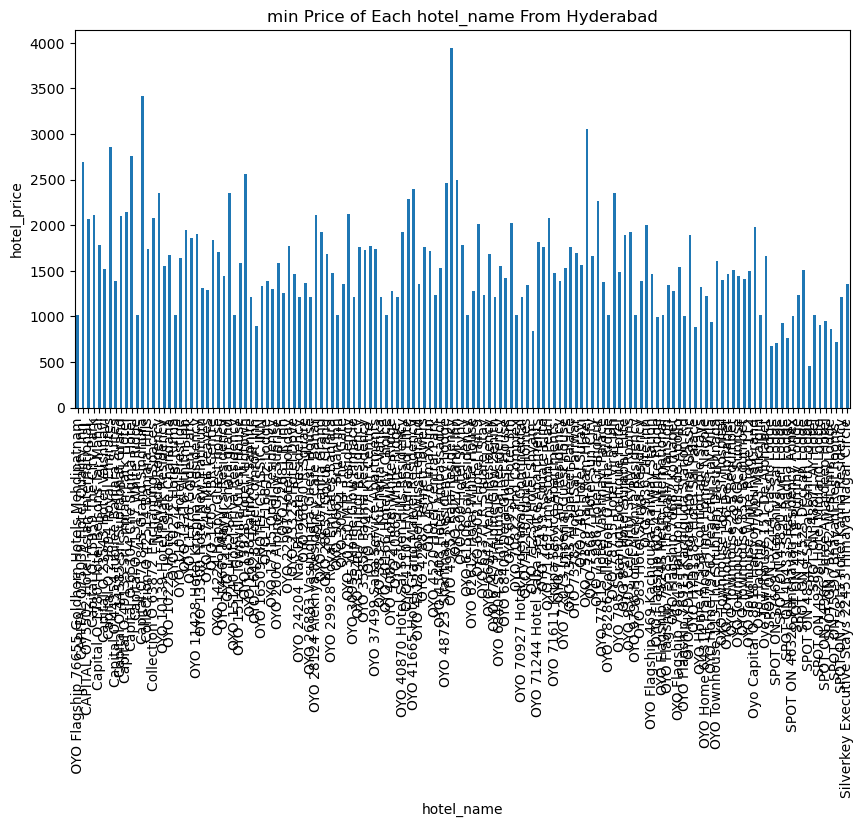

In [130]:
plt.figure(dpi=100,figsize=(10,5))
data_hyd_min.plot.bar()
plt.title('min Price of Each hotel_name From Hyderabad')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show

#### Visualize the Max Price of Each hotel_name From Hyderabad

In [131]:
data_hyd['hotel_price'].max()

3943.0

In [132]:
data_hyd.sort_values(['hotel_price'],ascending=False).head(2)

hotel_name  \
156        OYO 49253 Raja Residency   
157  Capital O 71843 Grand Sindhura   

                                      hotel_facilities       state  \
156   Private Entrance  Parking Facility  Reception...   Hyderabad   
157                        Reception  AC  AC  + 9 more   Hyderabad   

                                        hotel_address  rating no_of_ratings  \
156    Near Raja Deluxe Complex, Musheerabad, Hyderab     4.6  2501 Ratings   
157  Near near pardise hotel, Doctors Colony, Hyderab     4.0   390 Ratings   

    rating_performance  hotel_price  
156          Excellent       3943.0  
157               Good       3412.0

In [133]:
data_hyd_max = data_hyd.groupby('hotel_name')['hotel_price'].max()

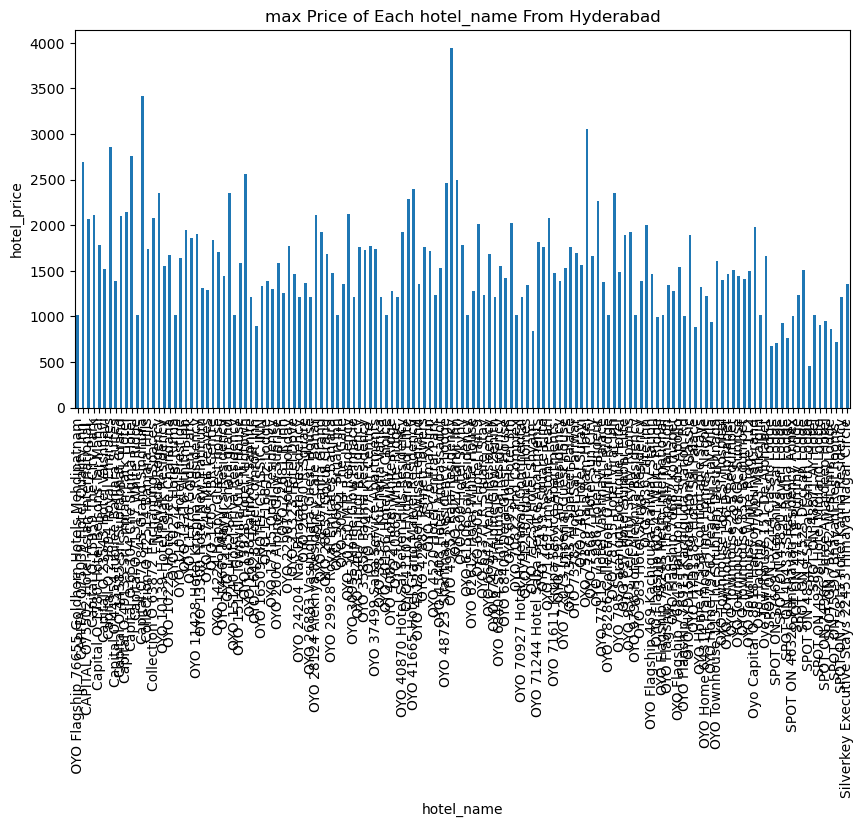

In [134]:
plt.figure(dpi=100,figsize=(10,5))
data_hyd_max.plot.bar()
plt.title('max Price of Each hotel_name From Hyderabad')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the Mean Price of Each hotel_name From Hyderabad

In [135]:
data_hyd_mean = data_hyd.groupby('hotel_name')['hotel_price'].mean()
data_hyd_mean.head()

hotel_name
 OYO Flagship 76655 Goldhorn Hotels Mehdipatnam    1014.0
CAPITAL O75039 Hotel Quality Inn                   2692.0
CAPITAL O75502 Hotel Asian International           2070.0
Capital O 15959 The City Park                      2113.0
Capital O 1780 Hotel Belsons Taj Mahal             1785.0
Name: hotel_price, dtype: float64

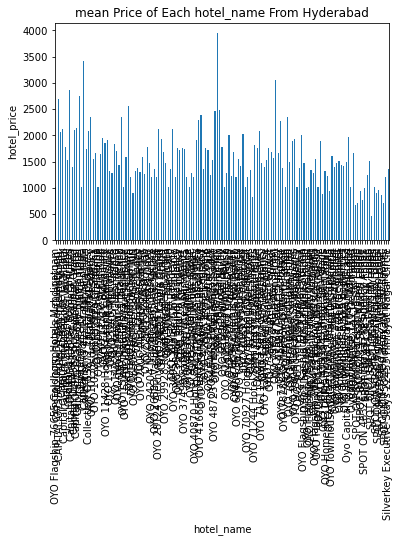

In [136]:
data_hyd_mean.plot.bar()
plt.title('mean Price of Each hotel_name From Hyderabad')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

C:\Users\pattn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


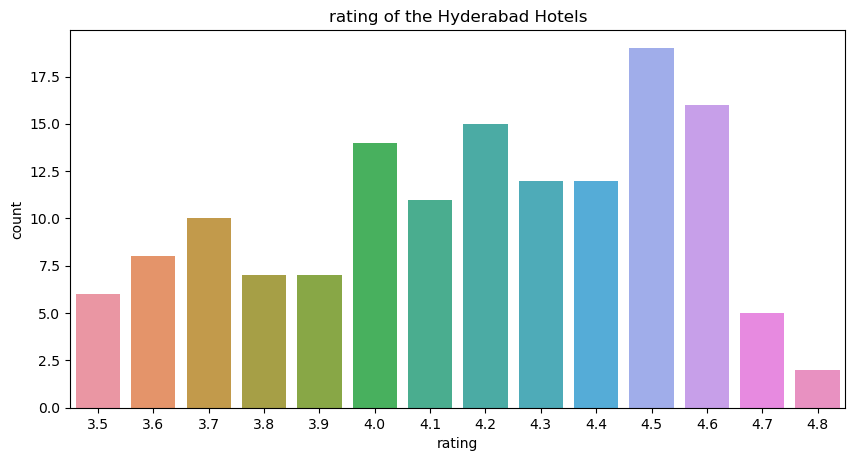

In [137]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(data_hyd.rating)
plt.title('rating of the Hyderabad Hotels')
plt.show()

## Get the Minimum maximum and Mean Price of each hotel_name from Gurgaon

In [138]:
data_gur.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                              min     max    mean
0   Oyo Townhouse 222 Sec 52, Gurgaon      1014.0  1014.0  1014.0
1             CAPITAL O 47966 GolfInn       662.0   662.0   662.0
2              CAPITAL O11243 Vedanta       889.0   889.0   889.0

#### Visualize the Min Price of Each hotel_name From Gurgaon

In [139]:
data_gur.groupby(['hotel_price']).min().head(2)

hotel_name  \
hotel_price                                     
562.0             Collection O 291 Sohna Road   
568.0        SPOT ON 78882 Shree Shakti Hotel   

                                              hotel_facilities    state  \
hotel_price                                                               
562.0         Parking Facility  Reception  Free Wifi  + 17 ...  Gurgaon   
568.0         Parking Facility  Reception  Caretaker  + 6 more  Gurgaon   

             hotel_address  rating no_of_ratings rating_performance  
hotel_price                                                          
562.0        Gurgaon, Gurg     4.1   607 Ratings               Good  
568.0          India, Gurg     4.3    29 Ratings               Good

In [140]:
data_gur_min = data_hyd.groupby('hotel_name')['hotel_price'].min()

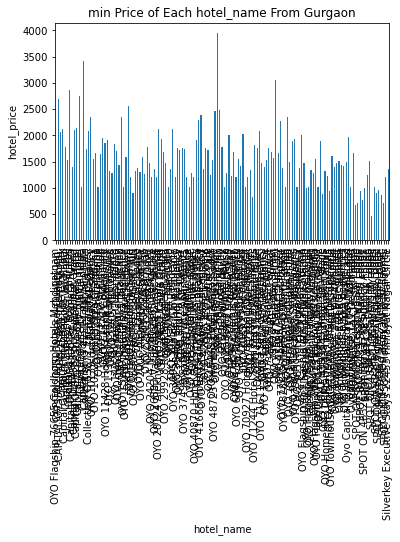

In [141]:
data_gur_min.plot.bar()
plt.title('min Price of Each hotel_name From Gurgaon')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the Max Price of Each hotel_name From Gurgaon

In [142]:
data_gur['hotel_price'].max()

3080.0

In [143]:
data_gur.sort_values(['hotel_price'],ascending=False).head(2)

hotel_name  \
1557      OYO 5309 Ambience Suites   
1473  OYO 67698 Mother's Residency   

                                    hotel_facilities    state  \
1557   Parking Facility  Free Wifi  Geyser  + 5 more  Gurgaon   
1473      Hair Dryer  Twin Single Bed  AC  + 15 more  Gurgaon   

                                hotel_address  rating no_of_ratings  \
1557          Near DLF Phase 3, T Block, Gurg     4.3   272 Ratings   
1473  Near CRPF Colony, Bhawani Enclave, Gurg     4.1   245 Ratings   

     rating_performance  hotel_price  
1557               Good       3080.0  
1473               Good       2272.0

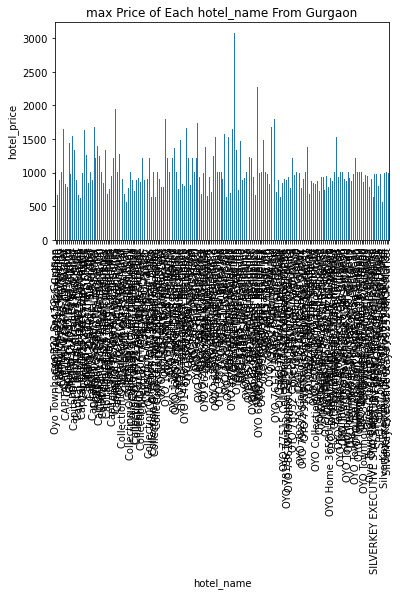

In [144]:
data_gur.groupby('hotel_name')['hotel_price'].max().plot(kind='bar')
plt.title('max Price of Each hotel_name From Gurgaon')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the Mean Price of Each hotel_name From Gurgaon

In [145]:
data_gur_mean= data_gur.groupby('hotel_name')['hotel_price'].mean()
data_gur_mean.head(3)

hotel_name
 Oyo Townhouse 222 Sec 52, Gurgaon    1014.0
CAPITAL O 47966 GolfInn                662.0
CAPITAL O11243 Vedanta                 889.0
Name: hotel_price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

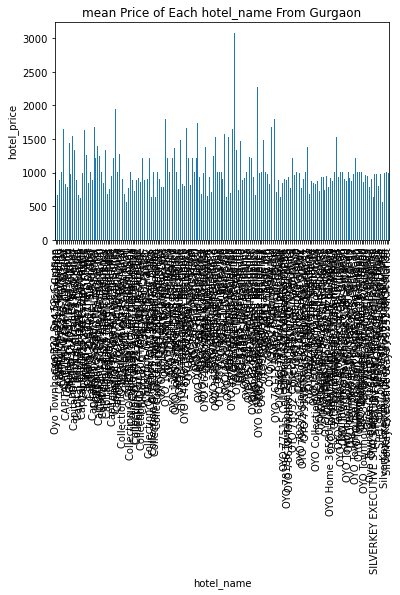

In [146]:
data_gur_mean.plot.bar()
plt.title('mean Price of Each hotel_name From Gurgaon')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show

## Get the Minimum maximum and Mean Price of each hotel_name from Kolkata

In [147]:
data_kol.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                                           min     max    mean
0   OYO 2766Guest Accomodation CK Block Guesthouse      1684.0  1684.0  1684.0
1               Capital O 14524 Platinum Solitaire      2018.0  2018.0  2018.0
2                    Capital O 1481 Hotel Heritage      1800.0  1800.0  1800.0

#### Visualize the Min Price of Each hotel_name From Kolkata

In [148]:
data_kol.groupby(['hotel_price']).min().head(3)

hotel_name  \
hotel_price                                                  
901.0                   OYO 78624 Flagship Hotel Today Inn   
924.0        Collection O 650 Gokul Residency Jessore Road   
943.0                      OYO 78674 Swagat Bissfull Stays   

                                           hotel_facilities    state  \
hotel_price                                                            
901.0         Reception  Free Wifi  Power backup  + 11 more  Kolkata   
924.0          Reception  Free Wifi  CCTV Cameras  + 8 more  Kolkata   
943.0           Elevator  Free Wifi  CCTV Cameras  + 6 more  Kolkata   

                              hotel_address  rating no_of_ratings  \
hotel_price                                                         
901.0                     West Bengal, Kolk     4.2    54 Ratings   
924.0        Near Emani City, Golpark, Kolk     4.4  4786 Ratings   
943.0                     West Bengal, Kolk     4.3    15 Ratings   

            rating_performance  
hotel_price                     
901.0                     Good  
924.0                     Good  
943.0                     Good

In [149]:
data_kol_min = data_kol.groupby('hotel_name')['hotel_price'].min()

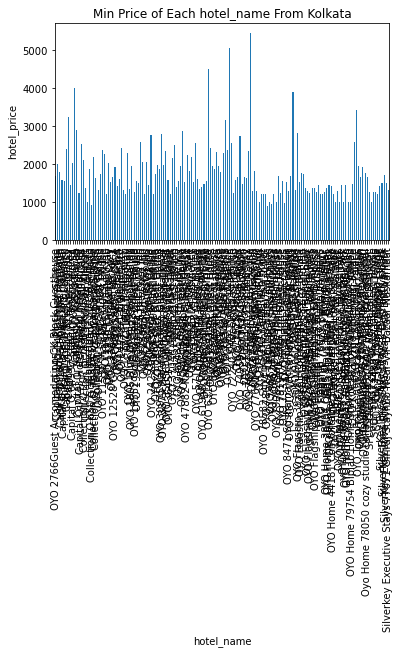

In [150]:
data_kol_min.plot.bar()
plt.title('Min Price of Each hotel_name From Kolkata')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()


#### Visualize the max Price of Each hotel_name From Kolkata

In [151]:
data_kol['hotel_price'].min()

901.0

In [152]:
data_kol.sort_values(['hotel_price'],ascending=False).head(3)

hotel_name  \
1090  OYO 76542 Joyguru Guest House   
1017       OYO 70583 Rainbow Palace   
977          OYO 63143 Airport View   

                                       hotel_facilities    state  \
1090   Parking Facility  Private Entrance  Free Wifi...  Kolkata   
1017   Private Entrance  Parking Facility  Reception...  Kolkata   
977                                AC  TV  AC  + 1 more  Kolkata   

                                      hotel_address  rating no_of_ratings  \
1090                                  Kolkata, Kolk     4.3   218 Ratings   
1017  Near Acropolis Mall, Rajdanga Main Road, Kolk     3.8   720 Ratings   
977                 Near Hajj Tower, Kaikhali, Kolk     4.2   521 Ratings   

     rating_performance  hotel_price  
1090               Good       5451.0  
1017               Good       5073.0  
977                Good       4511.0

In [153]:
data_kol_max=data_kol.groupby('hotel_name')['hotel_price'].max()

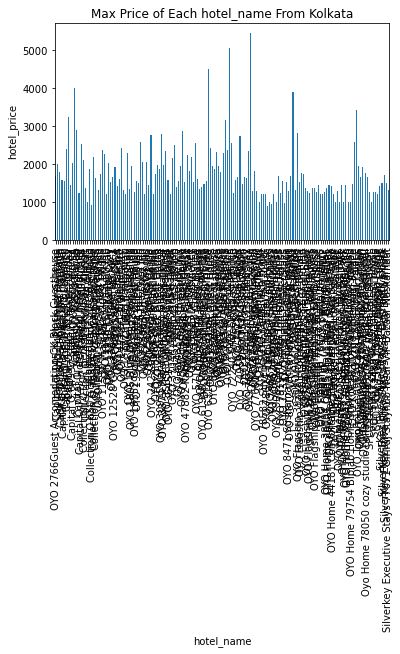

In [154]:
data_kol_max.plot.bar()
plt.title('Max Price of Each hotel_name From Kolkata')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()


#### Visualize the mean Price of Each hotel_name From Kolkata

In [155]:
data_kol_mean = data_kol.groupby('hotel_name')['hotel_price'].mean()
data_kol_mean.head(3)

hotel_name
 OYO 2766Guest Accomodation CK Block Guesthouse    1684.0
Capital O 14524 Platinum Solitaire                 2018.0
Capital O 1481 Hotel Heritage                      1800.0
Name: hotel_price, dtype: float64

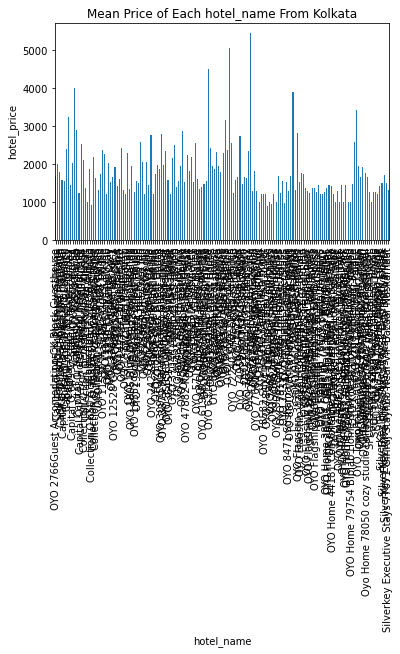

In [156]:
data_kol_mean.plot.bar()
plt.title('Mean Price of Each hotel_name From Kolkata')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()


## Get the Minimum maximum and Mean Price of each hotel_name from Bangalore

In [157]:
data_bang.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                        min     max    mean
0  Capital O 11092 Shiv Enclave      1014.0  1014.0  1014.0
1  Capital O 11959 Seven Olives      1393.0  1393.0  1393.0
2      Capital O 12543 3 Square      1663.0  1663.0  1663.0

#### Visualize the Min Price of Each hotel_name From Bangalore

In [158]:
data_bang.groupby(['hotel_price']).min().head(3)

hotel_name  \
hotel_price                                               
596.0                          SPOT ON 46264 M K Grande   
619.0                  SPOT ON 75643 Golden Guest House   
658.0        SPOT ON 41554 Hotel Sri Thirumala Paradise   

                                             hotel_facilities      state  \
hotel_price                                                                
596.0                      AC  TV  Parking Facility  + 6 more  Bangalore   
619.0         TV  Queen Sized Bed  Modern Wardrobe  + 65 more  Bangalore   
658.0                AC  Power backup  CCTV Cameras  + 6 more  Bangalore   

                                               hotel_address  rating  \
hotel_price                                                            
596.0        Near 140 Cottonpet Main road, Majestic, Bangalo     4.6   
619.0                          Near metro, Chickpet, Bangalo     3.6   
658.0               Near TCM Royan Road, Sevashrama, Bangalo     4.7   

            no_of_ratings rating_performance  
hotel_price                                   
596.0         398 Ratings          Excellent  
619.0         606 Ratings               Good  
658.0        1824 Ratings          Excellent

In [159]:
data_bang_min = data_bang.groupby('hotel_name')['hotel_price'].min()

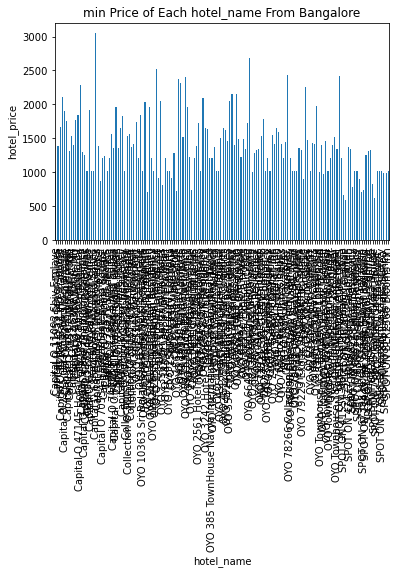

In [160]:
data_bang_min.plot.bar()
plt.title('min Price of Each hotel_name From Bangalore')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()


#### Visualize the max Price of Each hotel_name From Bangalore

In [161]:
data_bang['hotel_price'].max()

3051.0

In [162]:
data_bang.sort_values(['hotel_price'],ascending=False).head(3)

hotel_name  \
676  Capital O 68524 Hotel Brigade Legacy   
523        OYO 66437 Hotel Champion Grand   
634       OYO 12033 Hotel Royal Residence   

                                    hotel_facilities      state  \
676    Reception  Free Wifi  Power backup  + 13 more  Bangalore   
523    Reception  Free Wifi  Power backup  + 11 more  Bangalore   
634   Elevator  Electric Kettle  Free Wifi  + 9 more  Bangalore   

                                   hotel_address  rating no_of_ratings  \
676           Near MG ROAD, Ashok Nagar, Bangalo     4.0   383 Ratings   
523         Near Polar Bear, Nagarbhavi, Bangalo     4.3   386 Ratings   
634  Near Narayana Hospital, HSR Layout, Bangalo     4.2   218 Ratings   

    rating_performance  hotel_price  
676               Good       3051.0  
523               Good       2679.0  
634               Good       2527.0

In [163]:
data_bang_max = data_bang.groupby('hotel_name')['hotel_price'].max()

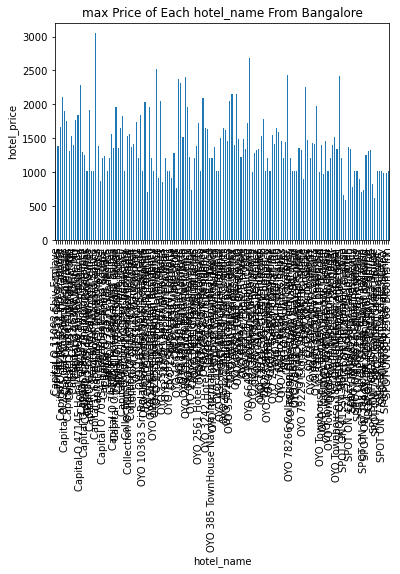

In [164]:
data_bang_max.plot.bar()
plt.title('max Price of Each hotel_name From Bangalore')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()


#### Visualize the mean Price of Each hotel_name From Bangalore

In [165]:
data_bang_mean = data_bang.groupby('hotel_name')['hotel_price'].mean()
data_bang_mean.head(3)

hotel_name
Capital O 11092 Shiv Enclave    1014.0
Capital O 11959 Seven Olives    1393.0
Capital O 12543 3 Square        1663.0
Name: hotel_price, dtype: float64

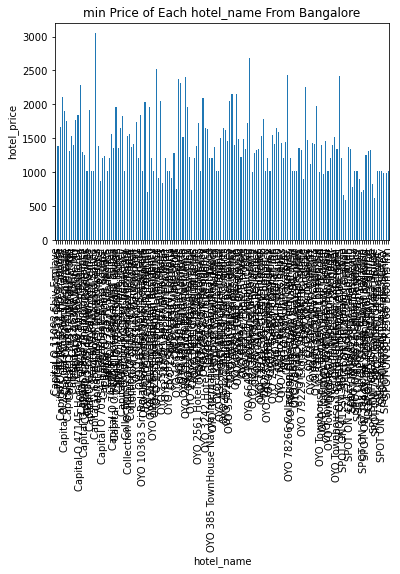

In [166]:
data_bang_mean.plot.bar()
plt.title('min Price of Each hotel_name From Bangalore')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()


## Get the Minimum maximum and Mean Price of each hotel_name from Noida

In [167]:
data_noida.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                              min     max    mean
0       Capital O (68099) AP Stay Inn      1354.0  1354.0  1354.0
1   Capital O (NOD1066) (Perfect INN)       988.0   988.0   988.0
2  Capital O 12722 Hotel Kiara Inn          994.0   994.0   994.0

#### Visualize the Min Price of Each hotel_name From Noida

In [168]:
data_bang.groupby(['hotel_price']).max().head(3)

hotel_name  \
hotel_price                                               
596.0                          SPOT ON 46264 M K Grande   
619.0                  SPOT ON 75643 Golden Guest House   
658.0        SPOT ON 41554 Hotel Sri Thirumala Paradise   

                                             hotel_facilities      state  \
hotel_price                                                                
596.0                      AC  TV  Parking Facility  + 6 more  Bangalore   
619.0         TV  Queen Sized Bed  Modern Wardrobe  + 65 more  Bangalore   
658.0                AC  Power backup  CCTV Cameras  + 6 more  Bangalore   

                                               hotel_address  rating  \
hotel_price                                                            
596.0        Near 140 Cottonpet Main road, Majestic, Bangalo     4.6   
619.0                          Near metro, Chickpet, Bangalo     3.6   
658.0               Near TCM Royan Road, Sevashrama, Bangalo     4.7   

            no_of_ratings rating_performance  
hotel_price                                   
596.0         398 Ratings          Excellent  
619.0         606 Ratings               Good  
658.0        1824 Ratings          Excellent

In [169]:
data_noida_min = data_noida.groupby('hotel_name')['hotel_price'].min()

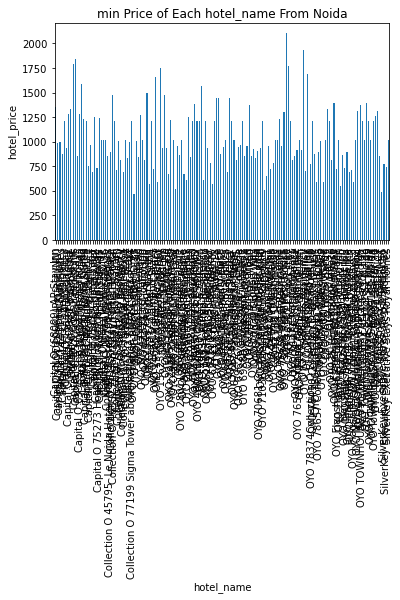

In [170]:
data_noida_min.plot.bar()
plt.title('min Price of Each hotel_name From Noida')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()


#### Visualize the max Price of Each hotel_name From Noida

In [171]:
data_noida['hotel_price'].max()

2107.0

In [172]:
data_noida.sort_values(['hotel_price'],ascending=False).head(3)

hotel_name  \
1335       OYO 75720 Raj Guest House   
1324        OYO 77488 Bits Residency   
1320  Capital O 4029 Cosy Tree Rooms   

                                       hotel_facilities  state  \
1335   Parking Facility  Reception  Free Wifi  + 10 ...  Noida   
1324   Reception  Ticket Tour Assistance  Free Wifi ...  Noida   
1320   Free Wifi  Power backup  Card Payment  + 11 more  Noida   

                                          hotel_address  rating no_of_ratings  \
1335      Near Vodafone Store, Yamaha Vihar Colony, Noi     4.1   468 Ratings   
1324                         I 56 Sector 41 Noida., Noi     3.5    49 Ratings   
1320  Near Indo Gulf Hospital & Diagnostics, Sector ...     3.9  1084 Ratings   

     rating_performance  hotel_price  
1335               Good       2107.0  
1324               Good       1930.0  
1320               Good       1837.0

In [173]:
data_noida_max= data_noida.groupby('hotel_name')['hotel_price'].max()

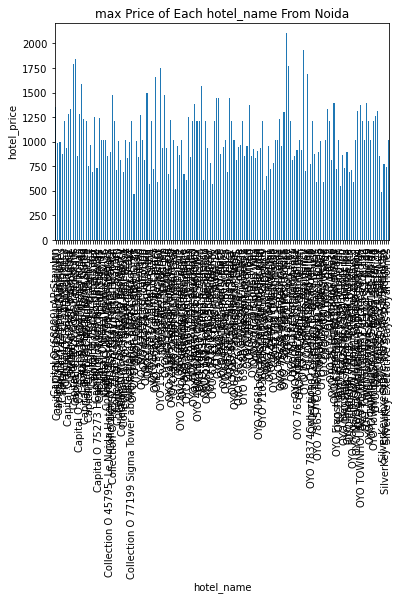

In [174]:
data_noida_max.plot.bar()
plt.title('max Price of Each hotel_name From Noida')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the mean Price of Each hotel_name From Noida

In [175]:
data_noida_mean= data_noida.groupby('hotel_name')['hotel_price'].mean()

In [176]:
data_noida_mean.head(3)

hotel_name
Capital O (68099) AP Stay Inn         1354.0
Capital O (NOD1066) (Perfect INN)      988.0
Capital O 12722 Hotel Kiara Inn        994.0
Name: hotel_price, dtype: float64

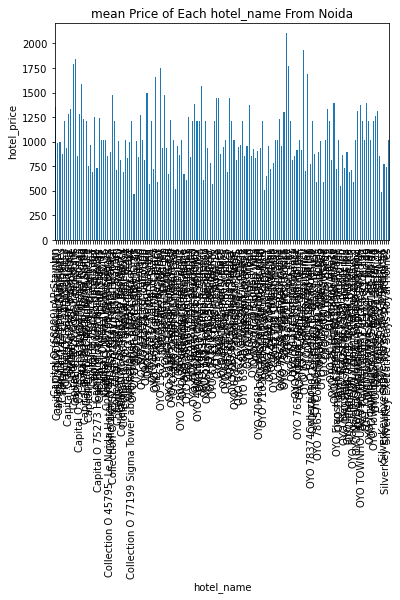

In [177]:
data_noida_mean.plot.bar()
plt.title('mean Price of Each hotel_name From Noida')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

## Get the Minimum maximum and Mean Price of each hotel_name from Delhi

In [178]:
data_delhi.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                                    min     max    mean
0       CAPITAL O74390 Hotel Grand Park Inn      2287.0  2287.0  2287.0
1  COLLECTION O 74381 HOTEL PR INN DAYALPUR      1669.0  1669.0  1669.0
2               Capital O 10750 Hotel Vivek      1443.0  1443.0  1443.0

#### Visualize the Min Price of Each hotel_name From Delhi

In [179]:
data_delhi.groupby(['hotel_price']).min().head(3)

hotel_name  \
hotel_price                                         
712.0                  SPOT ON 39899 Shyam Palace   
736.0        SPOT ON 61091 Hotel Silver Palace Dx   
775.0              OYO 75351 Hotel Moon Palace Dx   

                                      hotel_facilities  state  \
hotel_price                                                     
712.0                      AC  Reception  TV  + 8 more  Delhi   
736.0         AC  Reception  Queen Sized Bed  + 7 more  Delhi   
775.0                                          AC  TV   Delhi   

                                                 hotel_address  rating  \
hotel_price                                                              
712.0           Near R K Ashram Metro Station, Pahar Ganj, Del     4.3   
736.0            Near RK ASHRAM METRO STATION, Pahar Ganj, Del     4.0   
775.0        Near R.K. ASHRAM MARG METRO STATION, Pahar Gan...     3.5   

            no_of_ratings rating_performance  
hotel_price                                   
712.0         337 Ratings               Good  
736.0         458 Ratings               Good  
775.0         685 Ratings               Good

In [180]:
data_delhi_min = data_delhi.groupby('hotel_name')['hotel_price'].min()

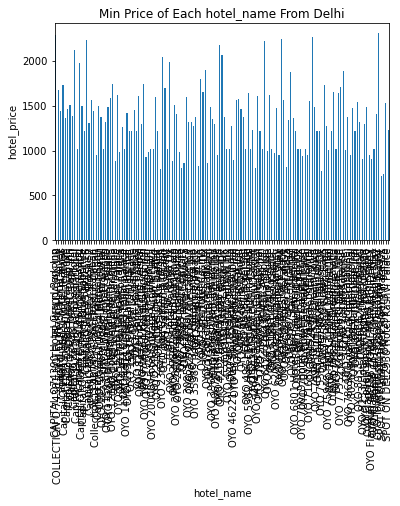

In [181]:
data_delhi_min.plot.bar()
plt.title('Min Price of Each hotel_name From Delhi')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the max Price of Each hotel_name From Delhi

In [182]:
data_delhi['hotel_price'].max()

2307.0

In [183]:
data_delhi.sort_values(['hotel_price'],ascending=False).head(3)

hotel_name  \
289    OYO Townhouse 37283 Derawal Nagar   
384  CAPITAL O74390 Hotel Grand Park Inn   
382           OYO 74524 Hotel Star Villa   

                                      hotel_facilities  state  \
289   Private Entrance  Reception  Free Wifi  + 11 ...  Delhi   
384          Free Wifi  Geyser  Power backup  + 9 more  Delhi   
382           CCTV Cameras  Power backup  AC  + 4 more  Delhi   

                                         hotel_address  rating no_of_ratings  \
289         Near Vinayak Hoptiat, Gujranwala Town, Del     4.2  1586 Ratings   
384           Near naiwala, Karol Bagh, Nai Walan, Del     4.6   886 Ratings   
382  Near RK Ashram Marg Metro station, Dariba Pan,...     3.6   650 Ratings   

    rating_performance  hotel_price  
289               Good       2307.0  
384          Excellent       2287.0  
382               Good       2269.0

In [184]:
data_delhi_max = data_delhi.groupby('hotel_name')['hotel_price'].min()

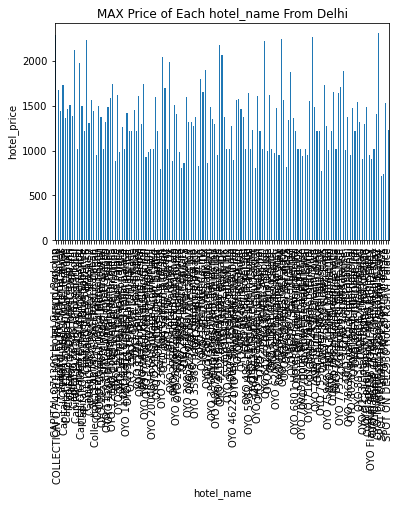

In [185]:
data_delhi_max.plot.bar()
plt.title('MAX Price of Each hotel_name From Delhi')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

## Get the Minimum maximum and Mean Price of each hotel_name from Mumbai

In [186]:
data_mumbai.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                                min     max    mean
0     CAPITAL O4482 Ascot International      1429.0  1429.0  1429.0
1           Capital O 12043 Hotel Konak      1373.0  1373.0  1373.0
2  Capital O 12063 Hotel Pearls BKC Inn      1481.0  1481.0  1481.0

#### Visualize the Min Price of Each hotel_name From Mumbai

In [187]:
data_mumbai.groupby(['hotel_price']).min().head(3)

hotel_name  \
hotel_price                                           
1014.0               Collection O 50232 ULIFE HOTEL   
1216.0       Capital O 22120 Hotel Universal Garden   
1236.0                       OYO 321 Hotel Crescent   

                                    hotel_facilities   state  \
hotel_price                                                    
1014.0                          AC  AC  TV  + 7 more  Mumbai   
1216.0                          AC  AC  TV  + 1 more  Mumbai   
1236.0        Reception  Free Wifi  Geyser  + 9 more  Mumbai   

                                                 hotel_address  rating  \
hotel_price                                                              
1014.0                                      Andheri East, Mumb     3.6   
1216.0       Near RBK International Academy, Chedda Nagar, ...     4.1   
1236.0               Near Asalpha Metro Station, Asalpha, Mumb     3.7   

            no_of_ratings rating_performance  
hotel_price                                   
1014.0        147 Ratings          Excellent  
1216.0        133 Ratings               Good  
1236.0       1056 Ratings               Good

In [188]:
data_mumbai_min = data_mumbai.groupby('hotel_name')['hotel_price'].min()

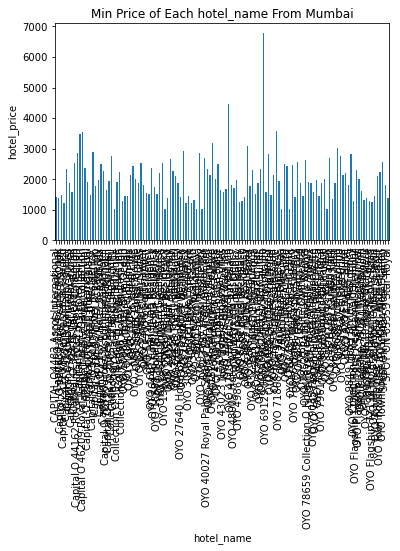

In [189]:
data_mumbai_min.plot.bar()
plt.title('Min Price of Each hotel_name From Mumbai')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the max Price of Each hotel_name From Mumbai

In [190]:
data_mumbai['hotel_price'].max()

6775.0

In [191]:
data_mumbai.sort_values(['hotel_price'],ascending=False).head(3)

hotel_name  \
849  OYO 66982 Hotel Skyway Inn   
882    OYO 44023 Hotel West Inn   
888  OYO 70475 Hotel Sea Breeze   

                                  hotel_facilities   state  \
849             Reception  Free Wifi  AC  + 9 more  Mumbai   
882                Free Wifi  Geyser  AC  + 6 more  Mumbai   
888   Reception  Free Wifi  CCTV Cameras  + 6 more  Mumbai   

                                         hotel_address  rating no_of_ratings  \
849         Near Lokmanya Tilak Nagar, Saki Naka, Mumb     3.6  1149 Ratings   
882  Near Chattrapati Shivaji International Airport...     4.0     1 Ratings   
888        Near Jankidevi School, SV Patel Nagar, Mumb     4.1    60 Ratings   

    rating_performance  hotel_price  
849               Good       6775.0  
882               Good       4447.0  
888               Good       3589.0

In [192]:
data_mumbai_max = data_mumbai.groupby('hotel_name')['hotel_price'].max()

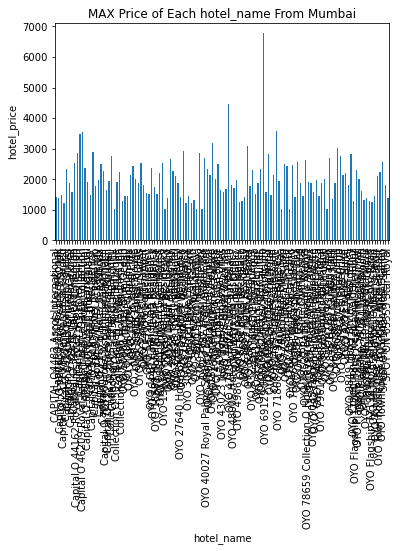

In [193]:
data_mumbai_max.plot.bar()
plt.title('MAX Price of Each hotel_name From Mumbai')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

## Get the Minimum maximum and Mean Price of each hotel_name from Pune

In [194]:
data_pune.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                            min     max    mean
0          CAPITAL O76174 Kuber Inn      1361.0  1361.0  1361.0
1  Capital O 10052 The Royal Samrat      2128.0  2128.0  2128.0
2       Capital O 12977 Hotel 22 LW      1924.0  1924.0  1924.0

#### Visualize the Min Price of Each hotel_name From Pune

In [195]:
data_pune.groupby(['hotel_price']).min().head(3)

hotel_name  \
hotel_price                                              
702.0        OYO Home 77978 Peaceful Stay Keshav Nagar   
773.0                  SPOT ON 74899 Vishwakarma Nivas   
806.0              OYO Home 77915 Hotel Royal Paradise   

                                              hotel_facilities state  \
hotel_price                                                            
702.0         Parking Facility  Private Entrance  Elevator ...  Pune   
773.0          Reception  CCTV Cameras  Power backup  + 3 more  Pune   
806.0         Private Entrance  Free Wifi  Power backup  + ...  Pune   

                                                 hotel_address  rating  \
hotel_price                                                              
702.0                                                      Mun     4.4   
773.0                            Near VIIT College, Kondhwa Ro     3.8   
806.0        Hotel Royal Paradise SN 11/9 Opp Madina Hotel ...     3.6   

            no_of_ratings rating_performance  
hotel_price                                   
702.0         351 Ratings               Good  
773.0         789 Ratings               Good  
806.0         121 Ratings               Good

In [196]:
data_pune_min = data_pune.groupby('hotel_name')['hotel_price'].min()

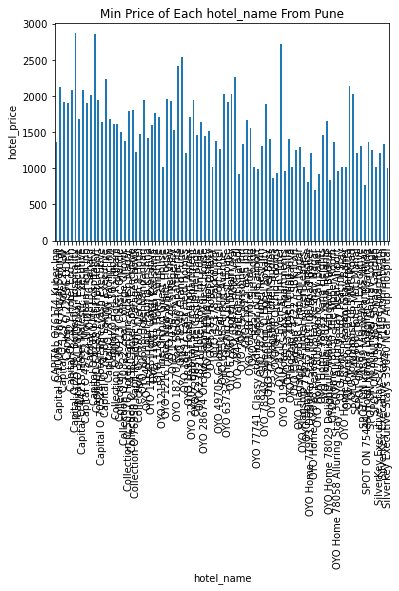

In [197]:
data_pune_min.plot.bar()
plt.title('Min Price of Each hotel_name From Pune')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the max Price of Each hotel_name From Pune

In [198]:
data_pune['hotel_price'].min()

702.0

In [199]:
data_pune.sort_values(['hotel_price'],ascending=False).head(3)

hotel_name  \
1179  Capital O 23397 Butterfly Hospitality   
1186        Capital O 62160 Ms Hospitality    
1168             OYO 8717 Everest Inn Hotel   

                                       hotel_facilities state  \
1179      Reception  Free Wifi  Power backup  + 12 more  Pune   
1186   Private Entrance  Parking Facility  Reception...  Pune   
1168        Elevator  Free Wifi  CCTV Cameras  + 6 more  Pune   

                         hotel_address  rating no_of_ratings  \
1179   Near Hiramarh Park, Kalyani Nag     4.5   184 Ratings   
1186      Near The K Factory, Baner Ro     4.4   247 Ratings   
1168  Near Vaibhav Theater , Tupe Comp     4.4   125 Ratings   

     rating_performance  hotel_price  
1179          Excellent       2874.0  
1186               Good       2871.0  
1168               Good       2731.0

In [200]:
data_pune_max = data_pune.groupby('hotel_name')['hotel_price'].min()

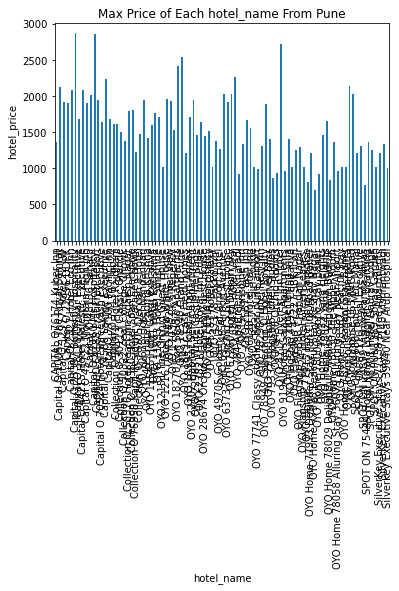

In [201]:
data_pune_max.plot.bar()
plt.title('Max Price of Each hotel_name From Pune')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

## Get the Minimum maximum and Mean Price of each hotel_name from Chennai

In [202]:
data_chennai.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                                         min     max    mean
0      CAPITAL O75820 Madras Metro Club, T Nagar      2278.0  2278.0  2278.0
1        Capital O 18946 Admire Suit Hospitality      1216.0  1216.0  1216.0
2  Capital O 66763 Blossoms Serviced Apartments       1440.0  1440.0  1440.0

#### Visualize the Min Price of Each hotel_name From Chennai

In [203]:
data_chennai.groupby(['hotel_price']).min().head(3)

hotel_name  \
hotel_price                                      
656.0          SPOT ON CHN1643 Grand Residency   
678.0            SPOT ON 75475 Cn Guest House    
702.0        SPOT ON 77468 Kunkumam Residency    

                                            hotel_facilities    state  \
hotel_price                                                             
656.0                    TV  Parking Facility  AC  + 14 more  Chennai   
678.0         TV  Queen Sized Bed  Queen Sized Bed  + 6 more  Chennai   
702.0                    AC  TV  Private Entrance  + 13 more  Chennai   

                                                 hotel_address  rating  \
hotel_price                                                              
656.0        Near Arumbakkam Metro Station, Loganathan Naga...     3.5   
678.0                     Opp TO Vijay Park, Arumbakkam, Chenn     4.0   
702.0                                        Triplicane, Chenn     4.6   

            no_of_ratings rating_performance  
hotel_price                                   
656.0         580 Ratings               Good  
678.0        1498 Ratings               Good  
702.0         197 Ratings          Excellent

In [204]:
data_chennai_min = data_chennai.groupby('hotel_name')['hotel_price'].min()

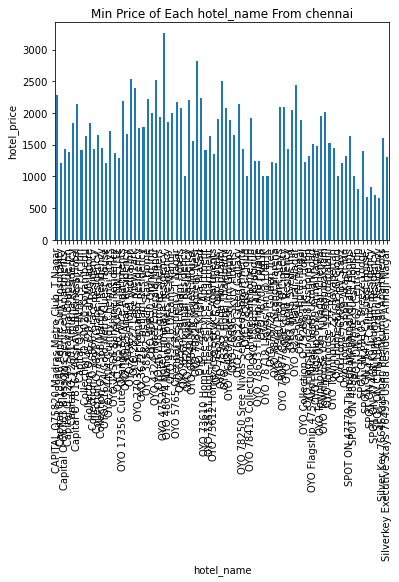

In [205]:
data_chennai_min.plot.bar()
plt.title('Min Price of Each hotel_name From chennai')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the max Price of Each hotel_name From Chennai

In [206]:
data_chennai['hotel_price'].max()

3264.0

In [207]:
data_chennai.sort_values(['hotel_price'],ascending=False).head(3)

hotel_name  \
423  OYO 47526 Hotel Himalaya Residency    
416              OYO 70824 Montieth Nest   
401            OYO 24963 Hotel Sudha Inn   

                                      hotel_facilities    state  \
423        Reception  AC  Daily Housekeeping  + 8 more  Chennai   
416   Parking Facility  Free Wifi  Power backup  + ...  Chennai   
401   Parking Facility  Free Wifi  Power backup  + ...  Chennai   

                                   hotel_address  rating no_of_ratings  \
423  Near Triplicane High Road, Triplicne, Chenn     4.1   942 Ratings   
416            Near Dominos PIzza, Egmore, Chenn     3.7   253 Ratings   
401        Near  railway hospital, Egmore, Chenn     4.1   181 Ratings   

    rating_performance  hotel_price  
423               Good       3264.0  
416               Good       2814.0  
401               Good       2541.0

In [208]:
data_chennai_max = data_chennai.groupby('hotel_name')['hotel_price'].max()

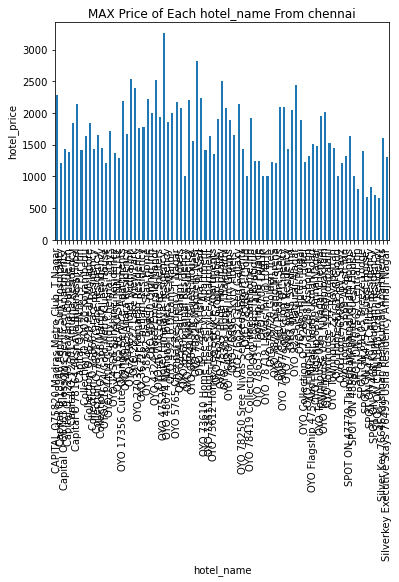

In [209]:
data_chennai_max.plot.bar()
plt.title('MAX Price of Each hotel_name From chennai')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

## Get the Minimum maximum and Mean Price of each hotel_name from Goa

In [210]:
data_goa.groupby(['hotel_name'],as_index=False).agg({'hotel_price':['min','max','mean']}).head(3)

hotel_name hotel_price                
                                                        min     max    mean
0  Capital O 22952 Accovah Lawande Beach Resort      2861.0  2861.0  2861.0
1           Capital O 64180 Adam's Beach Resort      2644.0  2644.0  2644.0
2         Capital O 77550 Ocean Wellness Resort      2098.0  2098.0  2098.0

#### Visualize the Min Price of Each hotel_name From Goa

In [211]:
data_goa.groupby(['hotel_price']).min().head(3)

hotel_name  \
hotel_price                                           
1216.0                    OYO 14964 Greenfield View   
1246.0       OYO Home 78159 Decent Studio Calangute   
1270.0           OYO Home 27665 Elegant Room Anjuna   

                                              hotel_facilities state  \
hotel_price                                                            
1216.0        Parking Facility  Geyser  Power backup  + 6 more   Goa   
1246.0        Power backup  CCTV Cameras  Refrigerator  + 3...   Goa   
1270.0               Free Wifi  Geyser  Power backup  + 9 more   Goa   

                            hotel_address  rating no_of_ratings  \
hotel_price                                                       
1216.0       Near Cafe Coffee Day, Candol     4.5    92 Ratings   
1246.0                              Salig     3.5    29 Ratings   
1270.0          Near Church & Prayers Chu     3.7    58 Ratings   

            rating_performance  
hotel_price                     
1216.0               Excellent  
1246.0                    Good  
1270.0                    Good

In [212]:
data_goa_min = data_goa.groupby('hotel_name')['hotel_price'].min()

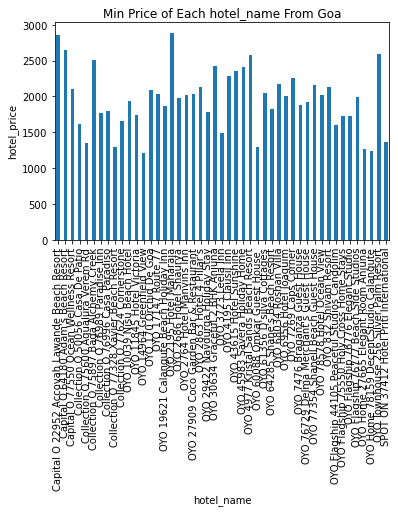

In [213]:
data_goa_min.plot.bar()
plt.title('Min Price of Each hotel_name From Goa')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the Max Price of Each hotel_name From Goa

In [214]:
data_goa['hotel_price'].max()

2888.0

In [215]:
data_goa.sort_values(['hotel_price'],ascending=False).head(3)

hotel_name  \
1657                       OYO 2195 Hotel Maharaja   
1652  Capital O 22952 Accovah Lawande Beach Resort   
1683           Capital O 64180 Adam's Beach Resort   

                                       hotel_facilities state  \
1657     Elevator  Electric Kettle  Free Wifi  + 9 more   Goa   
1652   Private Entrance  Reception  Power backup  + ...   Goa   
1683   Power backup  Card Payment  24/7 Checkin  + 1...   Goa   

                          hotel_address  rating no_of_ratings  \
1657  Near Karma Temptation, Vasco-Da-G     4.0   223 Ratings   
1652      Near Candolim Beach, Gauravad     3.5   182 Ratings   
1683                      Near Titos, B     4.3   138 Ratings   

     rating_performance  hotel_price  
1657               Good       2888.0  
1652               Good       2861.0  
1683               Good       2644.0

In [216]:
data_goa_max = data_goa.groupby('hotel_name')['hotel_price'].max()

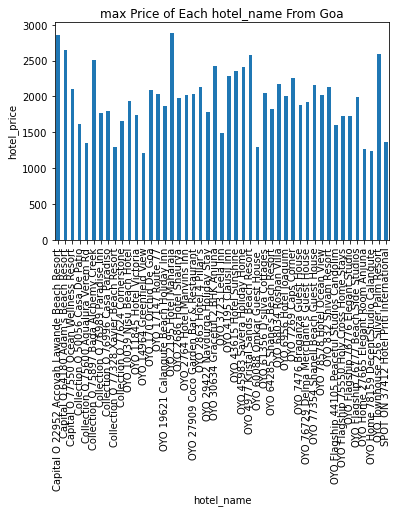

In [217]:
data_goa_max.plot.bar()
plt.title('max Price of Each hotel_name From Goa')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

#### Visualize the Mean Price of Each hotel_name From Goa

In [218]:
data_goa_mean = data_goa.groupby('hotel_name')['hotel_price'].mean()
data_goa_mean.head(3)

hotel_name
Capital O 22952 Accovah Lawande Beach Resort    2861.0
Capital O 64180 Adam's Beach Resort             2644.0
Capital O 77550 Ocean Wellness Resort           2098.0
Name: hotel_price, dtype: float64

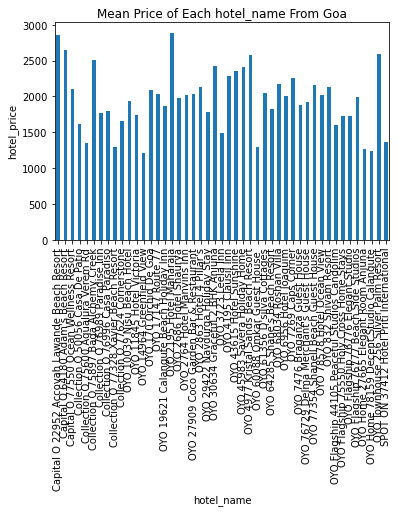

In [219]:
data_goa_mean.plot.bar()
plt.title('Mean Price of Each hotel_name From Goa')
plt.xlabel('hotel_name')
plt.ylabel('hotel_price')
plt.show()

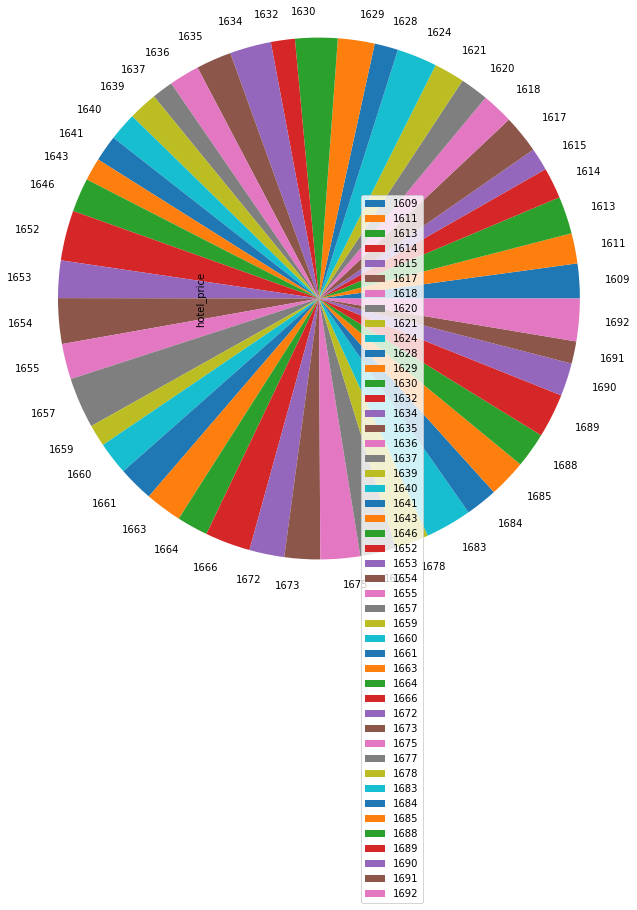

In [220]:
data_goa.plot(x='rating',y='hotel_price',kind = 'pie',radius=3)
plt.show()

   On Above Chart Checking Goa Hotel Rating & Prices

In [221]:
#data3.to_csv(r'C:\\Users\\pattn\\Videos\\python\\DATA SCREAPING\\OYO_Hotel_Cleaned_Data_Project_Completed.csv')